# Exploratory Data Analysis on Uber Drive Data
* The primary goal of this project is to perform exploratory data analysis on the Uber drive dataset.
* Dataset Link - shorturl.at/hPQ13

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_palette('Set2')

## Reading in the dataset

In [2]:
df = pd.read_csv("My Uber Drives - 2016.csv")

## Getting the basic properties of our dataset

In [3]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.shape

(1156, 7)

The dataset has 1156 entries and 7 attributes.

In [5]:
df.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [7]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

## Checking for missing values in the dataset

In [8]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

There are `1` missing values in every column except the `PURPOSE*` column, where there are `503` missing values and `START_DATE*` and `END_DATE*` columns where there are no missing values.

In the `PURPOSE*` column, the missing values may be because the rider could not disclose the purpose. So it is a good idea to fill in the missing values of the `PURPOSE*` column by `Not Disclosed`.

But before we do that, let's first rename the columns so it would be easier to perform exploratory data analysis and data cleaning.

## Renaming the columns

In [9]:
df.columns = ['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES', 'PURPOSE']

## Filling in the `NAN` values of the `PURPOSE` column by `Not Disclosed`

In [10]:
df['PURPOSE'] = df['PURPOSE'].fillna('Not Disclosed')

In [11]:
df['PURPOSE'].isnull().sum()

0

## Now we find and drop the duplicated rows in the dataset

In [12]:
df[df.duplicated()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [13]:
df = df.drop_duplicates()

In [14]:
df[df.duplicated()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE


## Now let's check for some invalid entries where both the `START_DATE` and `END_DATE` are same

In [15]:
df[df['START_DATE'] == df['END_DATE']]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
751,9/6/2016 17:49,9/6/2016 17:49,Business,Unknown Location,Unknown Location,69.1,Not Disclosed
761,9/16/2016 7:08,9/16/2016 7:08,Business,Unknown Location,Unknown Location,1.6,Not Disclosed
798,10/8/2016 15:03,10/8/2016 15:03,Business,Karachi,Karachi,3.6,Not Disclosed
807,10/13/2016 13:02,10/13/2016 13:02,Business,Islamabad,Islamabad,0.7,Not Disclosed


As we see this is invalid we can drop these rows.

## Dropping invalid rows

In [16]:
invalid_idx = df[df['START_DATE'] == df['END_DATE']].index # get the index of these invalid entries

In [17]:
df = df.drop(invalid_idx, axis =0)

## Now we check for the unique values present in the columns like `CATEGORY`, `START`, `STOP` and `PURPOSE`

In [18]:
df['CATEGORY'].unique()

array(['Business', 'Personal', nan], dtype=object)

In [19]:
df['START'].unique()

array(['Fort Pierce', 'West Palm Beach', 'Cary', 'Jamaica', 'New York',
       'Elmhurst', 'Midtown', 'East Harlem', 'Flatiron District',
       'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Downtown', 'Gulfton', 'Houston', 'Eagan Park',
       'Morrisville', 'Durham', 'Farmington Woods', 'Whitebridge',
       'Lake Wellingborough', 'Fayetteville Street', 'Raleigh',
       'Hazelwood', 'Fairmont', 'Meredith Townes', 'Apex', 'Chapel Hill',
       'Northwoods', 'Edgehill Farms', 'Tanglewood', 'Preston',
       'Eastgate', 'East Elmhurst', 'Jackson Heights', 'Long Island City',
       'Katunayaka', 'Unknown Location', 'Colombo', 'Nugegoda',
       'Islamabad', 'R?walpindi', 'Noorpur Shahan', 'Heritage Pines',
       'Westpark Place', 'Waverly Place', 'Wayne Ridge', 'Weston',
       'East Austin', 'West University', 'South Congress', 'The Drag',
       'Congress Ave District', 'Red River District', 'Georgian Acres',
       'North Austin', 'Coxville', 'Conven

In [20]:
df['STOP'].unique()

array(['Fort Pierce', 'West Palm Beach', 'Palm Beach', 'Cary',
       'Morrisville', 'New York', 'Queens', 'East Harlem', 'NoMad',
       'Midtown', 'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Queens County', 'Gulfton', 'Downtown',
       'Houston', 'Jamestown Court', 'Durham', 'Whitebridge',
       'Lake Wellingborough', 'Raleigh', 'Umstead', 'Hazelwood',
       'Westpark Place', 'Meredith Townes', 'Leesville Hollow', 'Apex',
       'Chapel Hill', 'Williamsburg Manor', 'Macgregor Downs',
       'Edgehill Farms', 'Northwoods', 'Tanglewood', 'Preston',
       'Walnut Terrace', 'Jackson Heights', 'East Elmhurst',
       'Midtown West', 'Long Island City', 'Jamaica', 'Unknown Location',
       'Colombo', 'Nugegoda', 'Katunayaka', 'Islamabad', 'R?walpindi',
       'Noorpur Shahan', 'Heritage Pines', 'Waverly Place', 'Wayne Ridge',
       'Depot Historic District', 'Weston', 'West University',
       'South Congress', 'Arts District', 'Congress Ave District

In [21]:
df['PURPOSE'].unique()

array(['Meal/Entertain', 'Not Disclosed', 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

## Now we convert the `START_DATE` and `END_DATE` columns into a `datetime` object using the function `pd.to_datetime`

In [22]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1151 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1150 non-null   datetime64[ns]
 1   END_DATE    1150 non-null   datetime64[ns]
 2   CATEGORY    1150 non-null   object        
 3   START       1150 non-null   object        
 4   STOP        1150 non-null   object        
 5   MILES       1151 non-null   float64       
 6   PURPOSE     1151 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 71.9+ KB


## We find out for what reason the rider takes Uber most by  plotting a `count plot` of the `CATEGORY` column

<AxesSubplot:xlabel='CATEGORY', ylabel='count'>

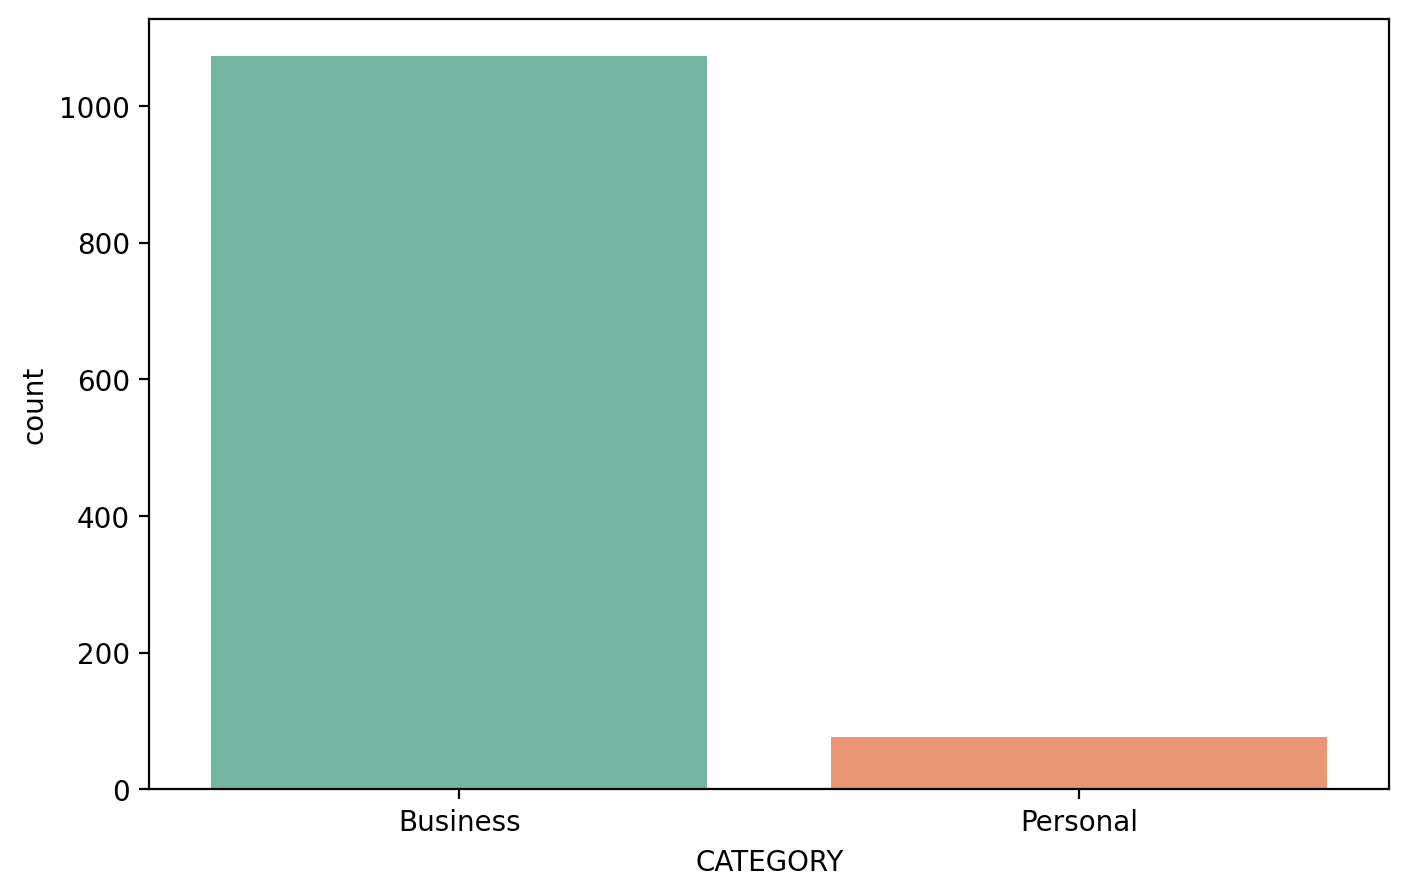

In [24]:
plt.figure(figsize=(8,5), dpi=200)
sns.countplot('CATEGORY', data=df)

From the above plot we can see that most of the drives taken by the rider was for business purposes.

## Now we plot which is the city that the rider starts and stops the most by plotting a `bar plot` of the `START` and `STOP` columns

In [25]:
popular_start = df['START'].value_counts().nlargest(20)

We use the `nlargest` and `value_counts` function to plot the top 20 highest count values.

Text(0, 0.5, 'Value counts')

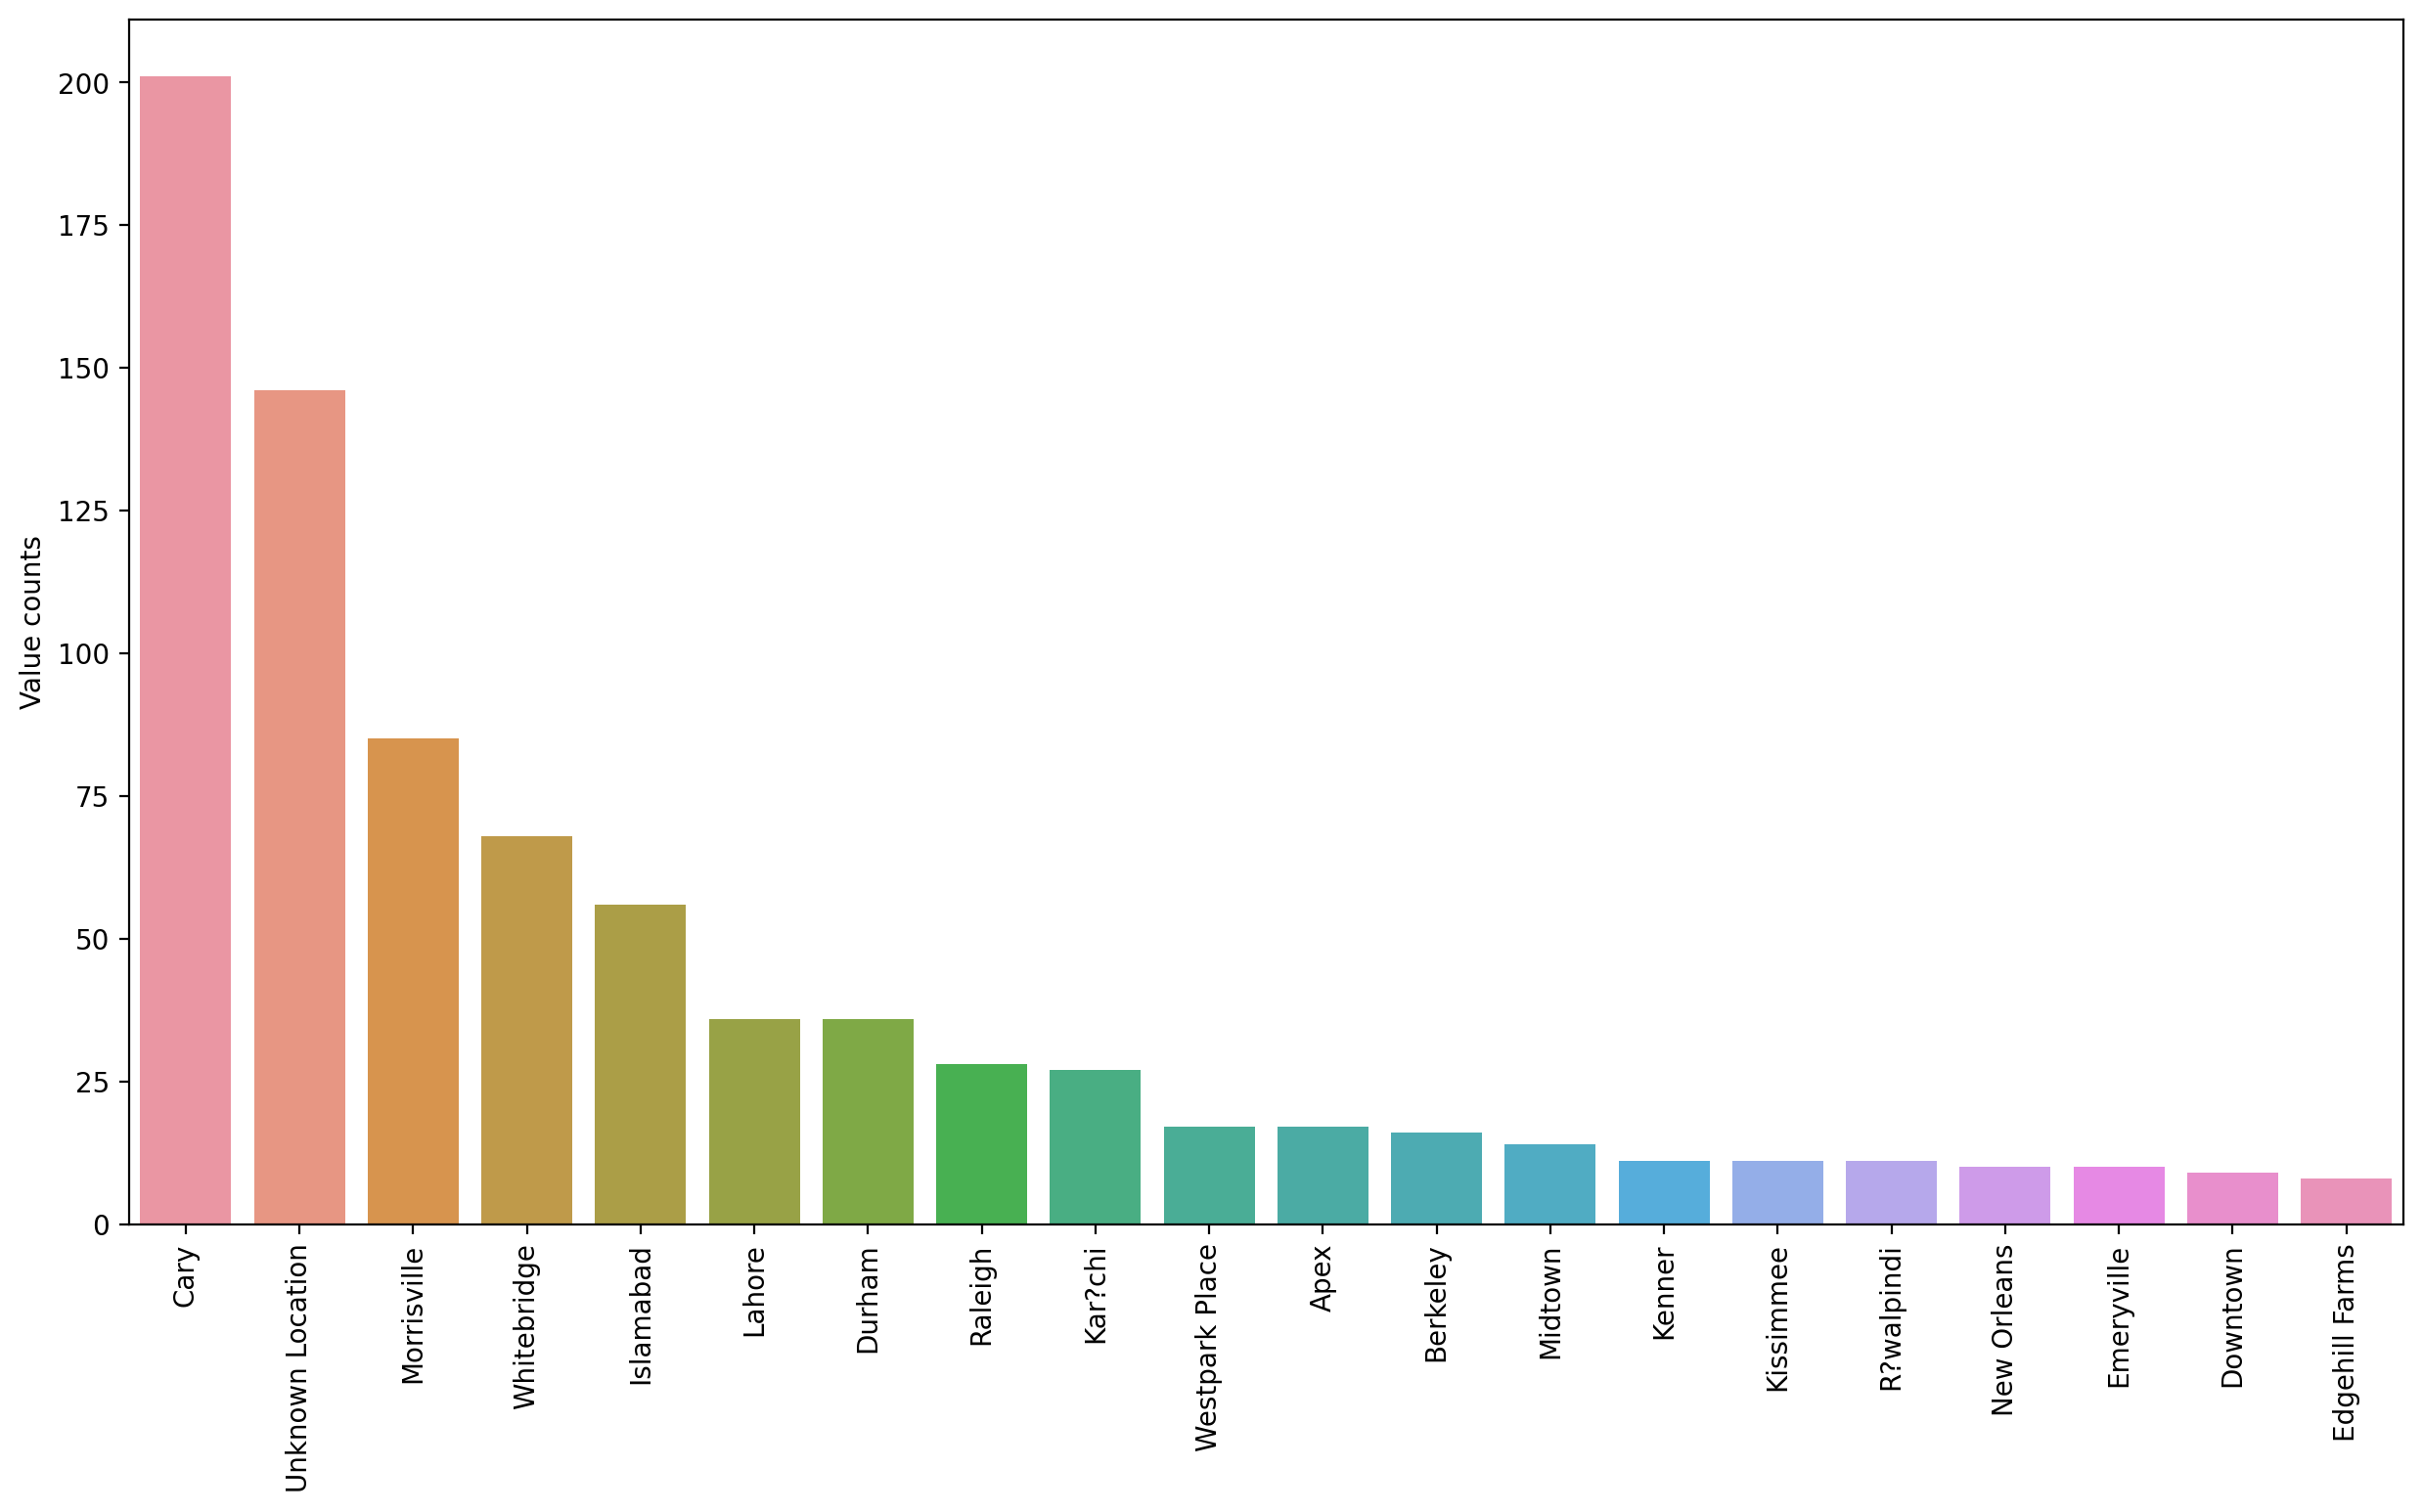

In [26]:
plt.figure(figsize=(15,8), dpi=200)
plt.xticks(rotation=90);
sns.barplot(x=popular_start.index, y=popular_start)
plt.ylabel('Value counts');

We infer two things from the above plot.
* The rider starts mostly from `Cary`
* There is an anomaly in the city name of the nineth bar `Kar?chi`. We might need to fix that.

But before that let's plot the popular stop cities.

In [27]:
popular_stop = df['STOP'].value_counts().nlargest(20)

Text(0, 0.5, 'Value counts')

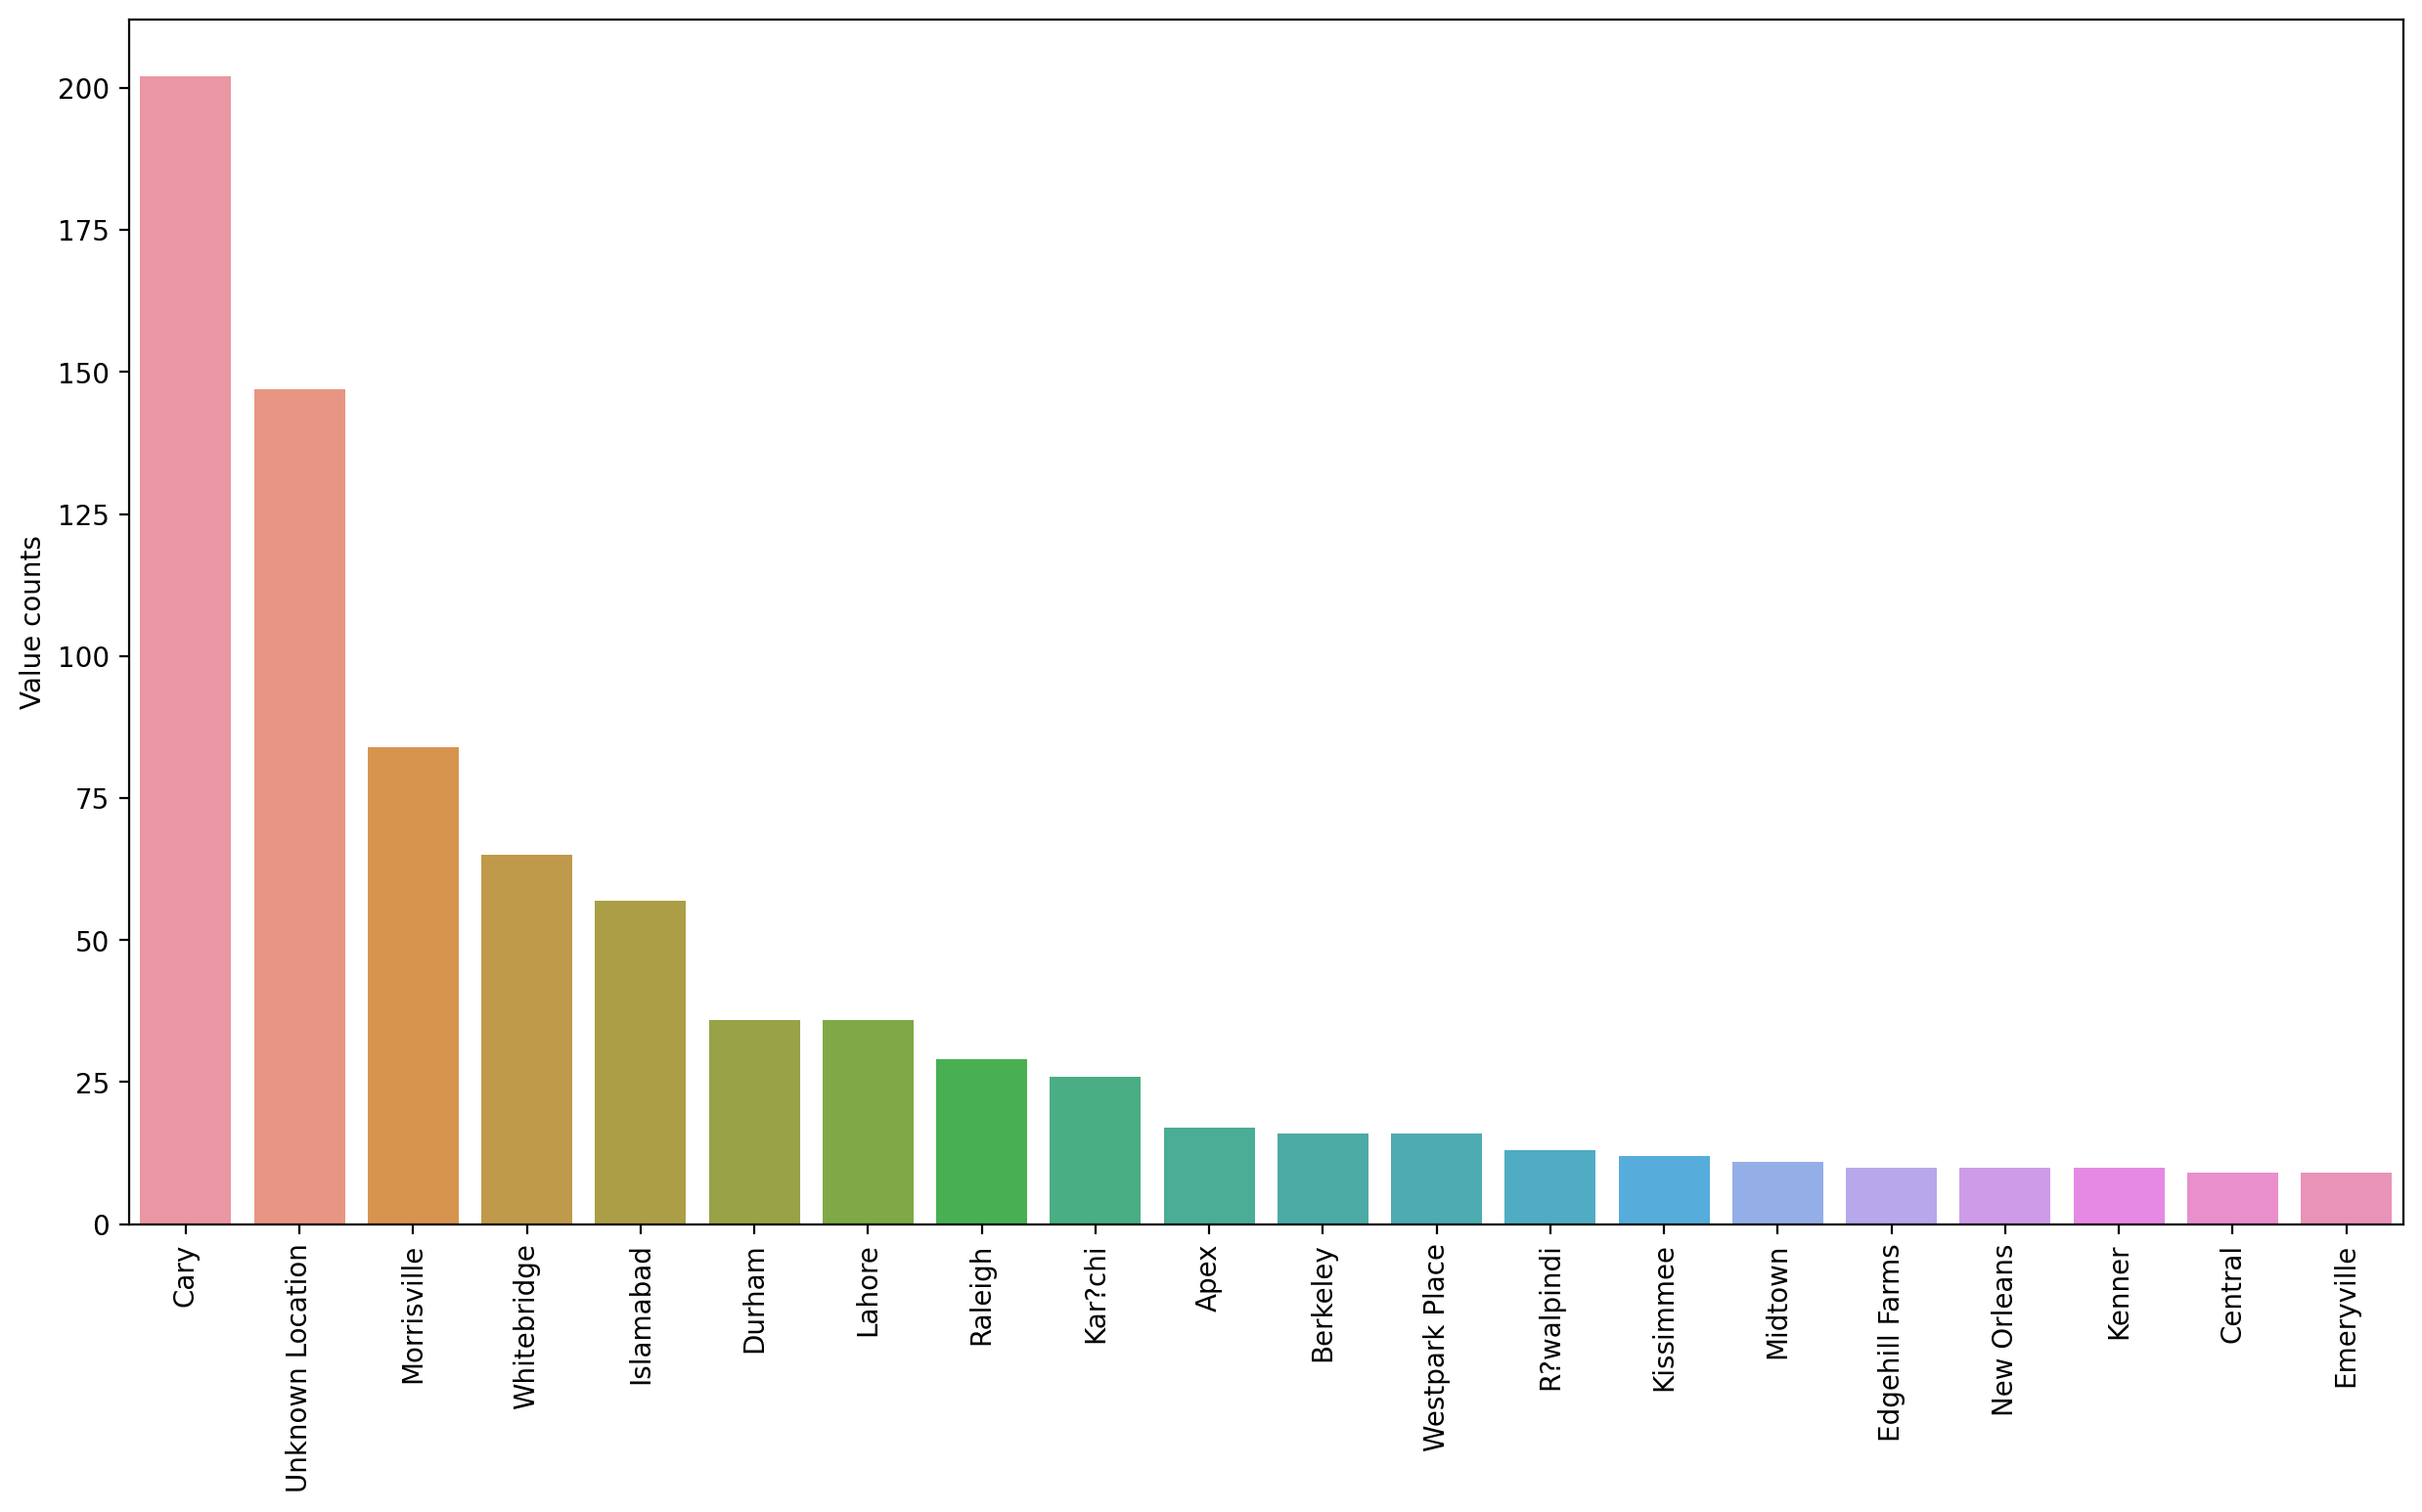

In [28]:
plt.figure(figsize=(15,8), dpi=200)
plt.xticks(rotation=90);
sns.barplot(x=popular_stop.index, y=popular_stop)
plt.ylabel('Value counts');

Even in this plot `Cary` is the most popular stop city and an anomaly in the city name `Kar?chi`

## Fixing the anomaly in the `START` and `STOP` columns

In [29]:
len(df[df['START'] == 'Kar?chi'])

27

There are 27 rows in `START` column where the value is `Kar?chi`.

In [30]:
len(df[df['STOP'] == 'Kar?chi'])

26

There are 26 rows in `STOP` column where the value is `Kar?chi`.

In [31]:
def fix_anomaly(str):
    if str == 'Kar?chi':
        return 'Karachi'
    else:
        return str

We write a function that returns `Karachi` if the value is `Kar?chi` else returns the string itself.

In [32]:
df['START'] = df['START'].apply(fix_anomaly)
df['STOP'] = df['STOP'].apply(fix_anomaly)

We use the `apply` function in pandas to apply a custom function to our dataframe.

In [33]:
len(df[df['START'] == 'Kar?chi'])

0

In [34]:
len(df[df['STOP'] == 'Kar?chi'])

0

## Now we plot which is the city that the rider starts and stops the most by plotting a `bar plot` of the `START` and `STOP` columns after fixing the anomaly.

In [35]:
popular_start = df['START'].value_counts().nlargest(20)

Text(0, 0.5, 'Value counts')

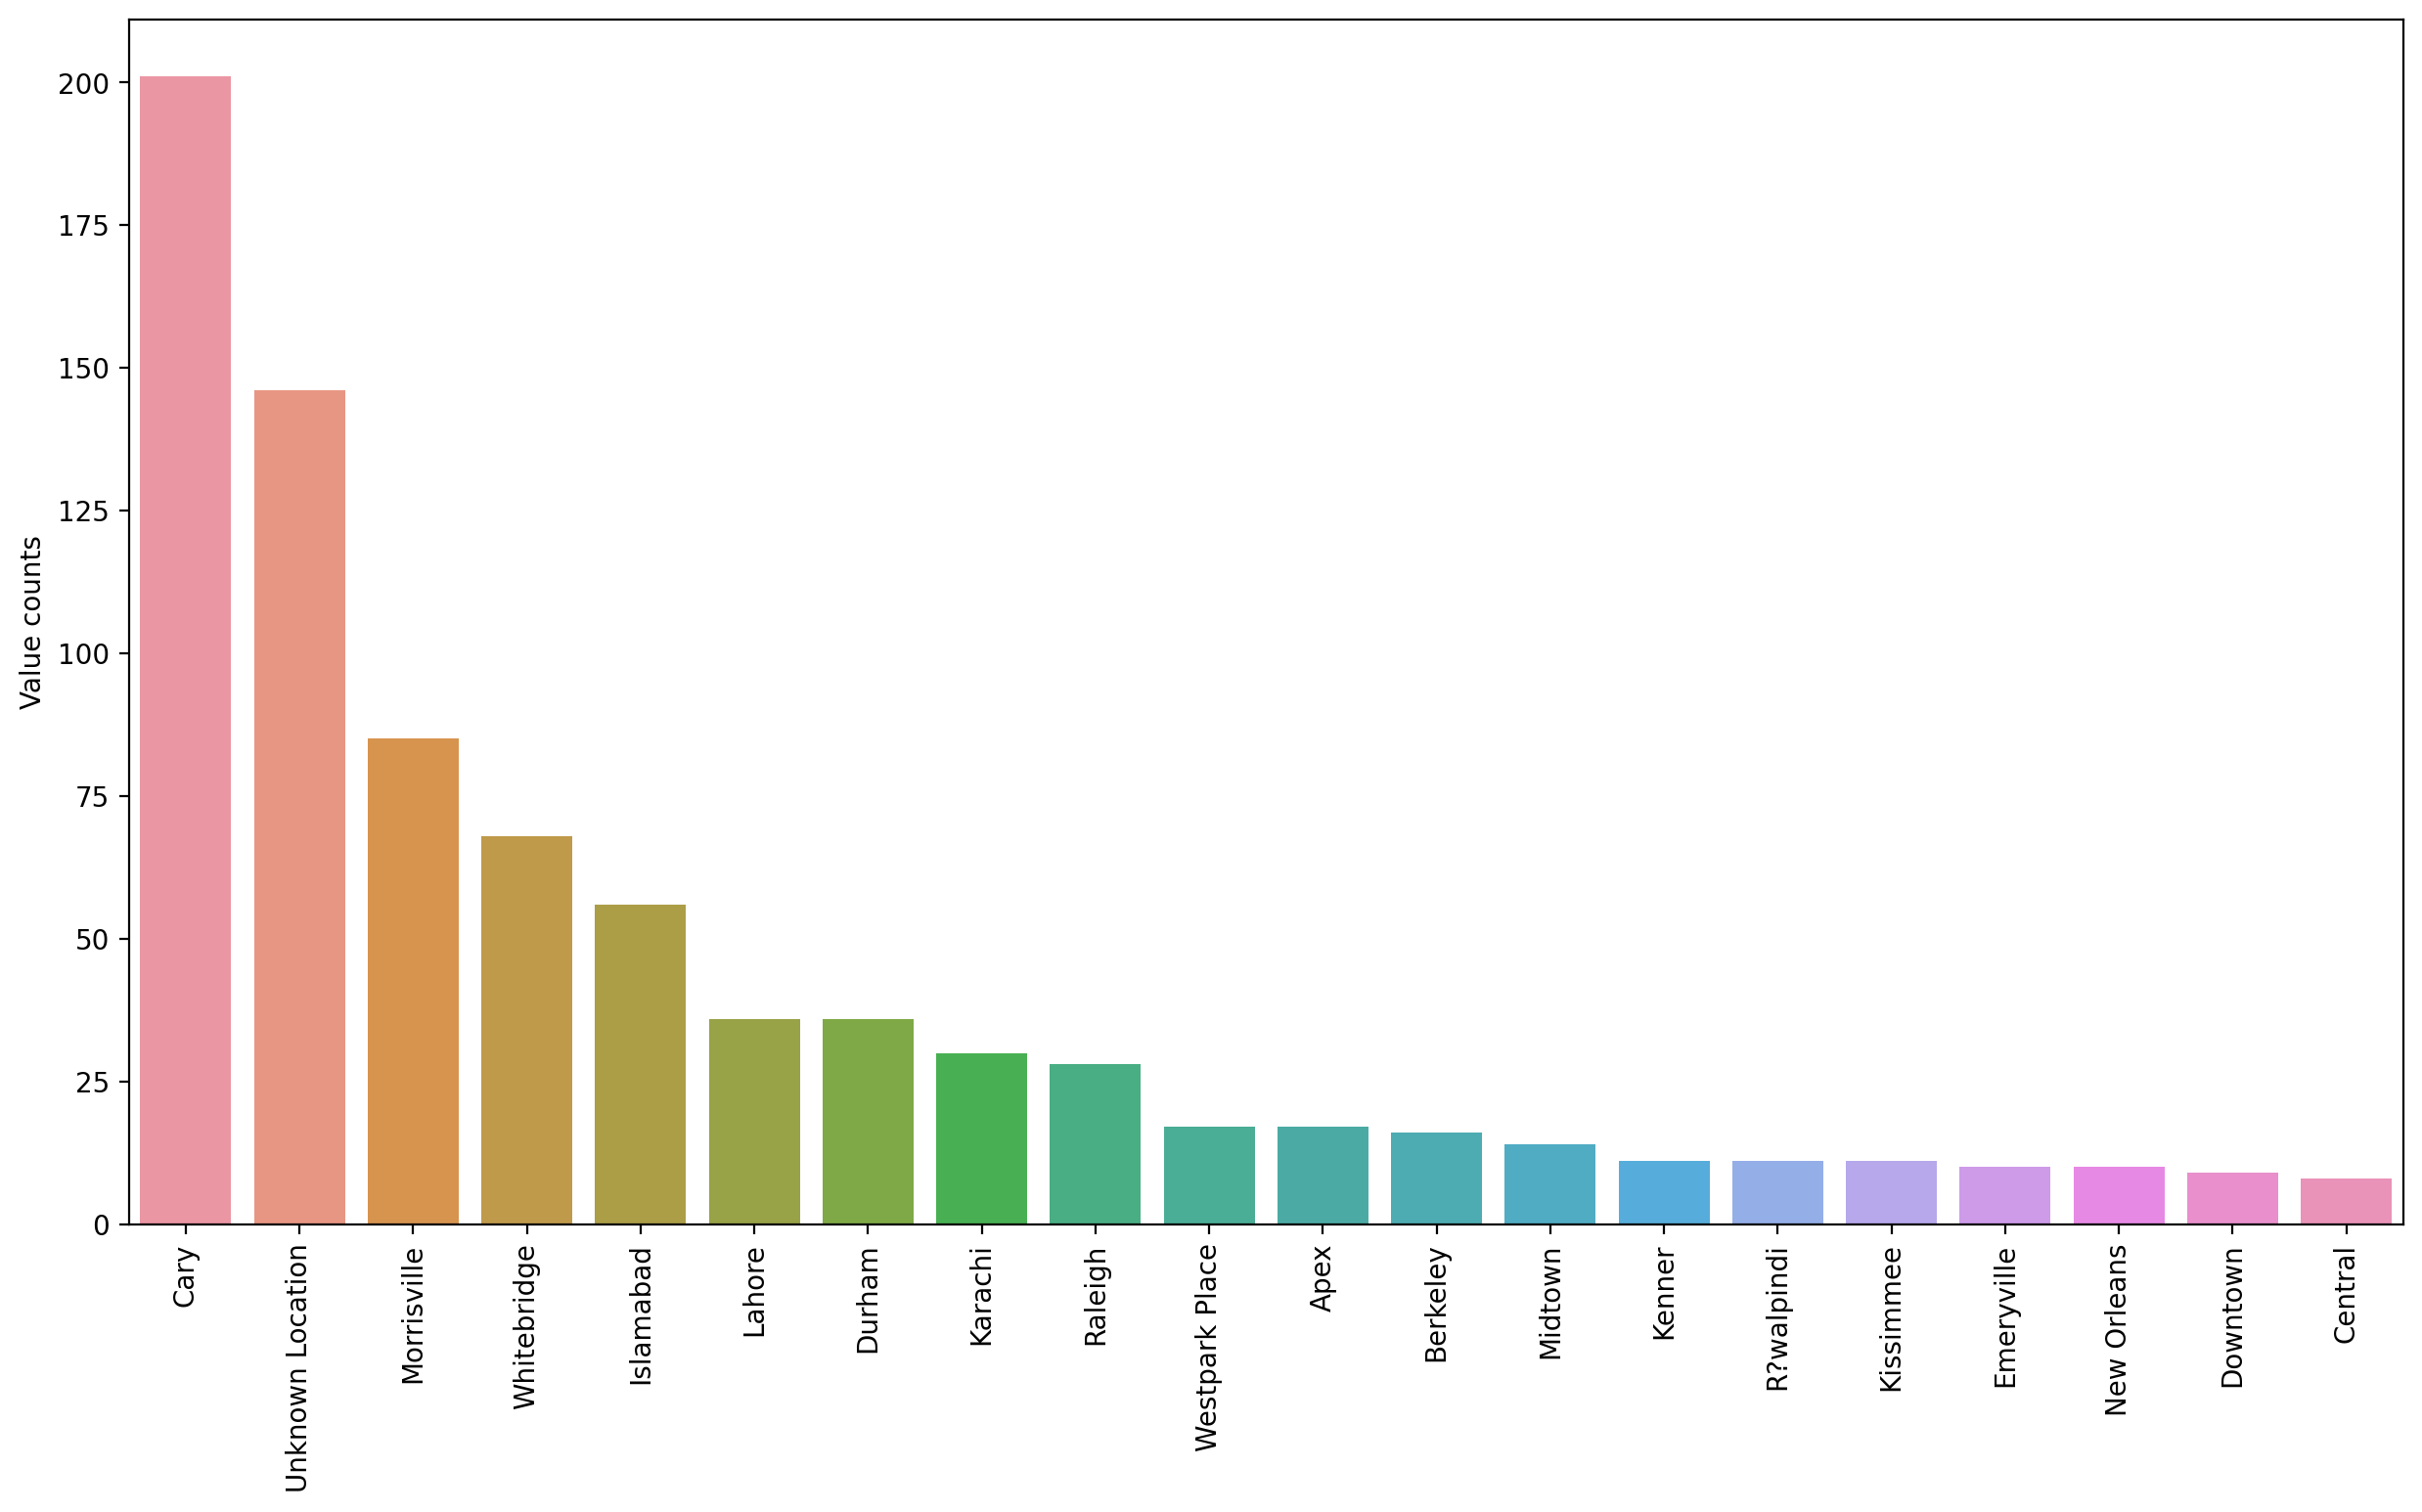

In [36]:
plt.figure(figsize=(15,8), dpi=200)
plt.xticks(rotation=90);
sns.barplot(x=popular_start.index, y=popular_start)
plt.ylabel('Value counts');

In [37]:
popular_stop = df['STOP'].value_counts().nlargest(20)

Text(0, 0.5, 'Value counts')

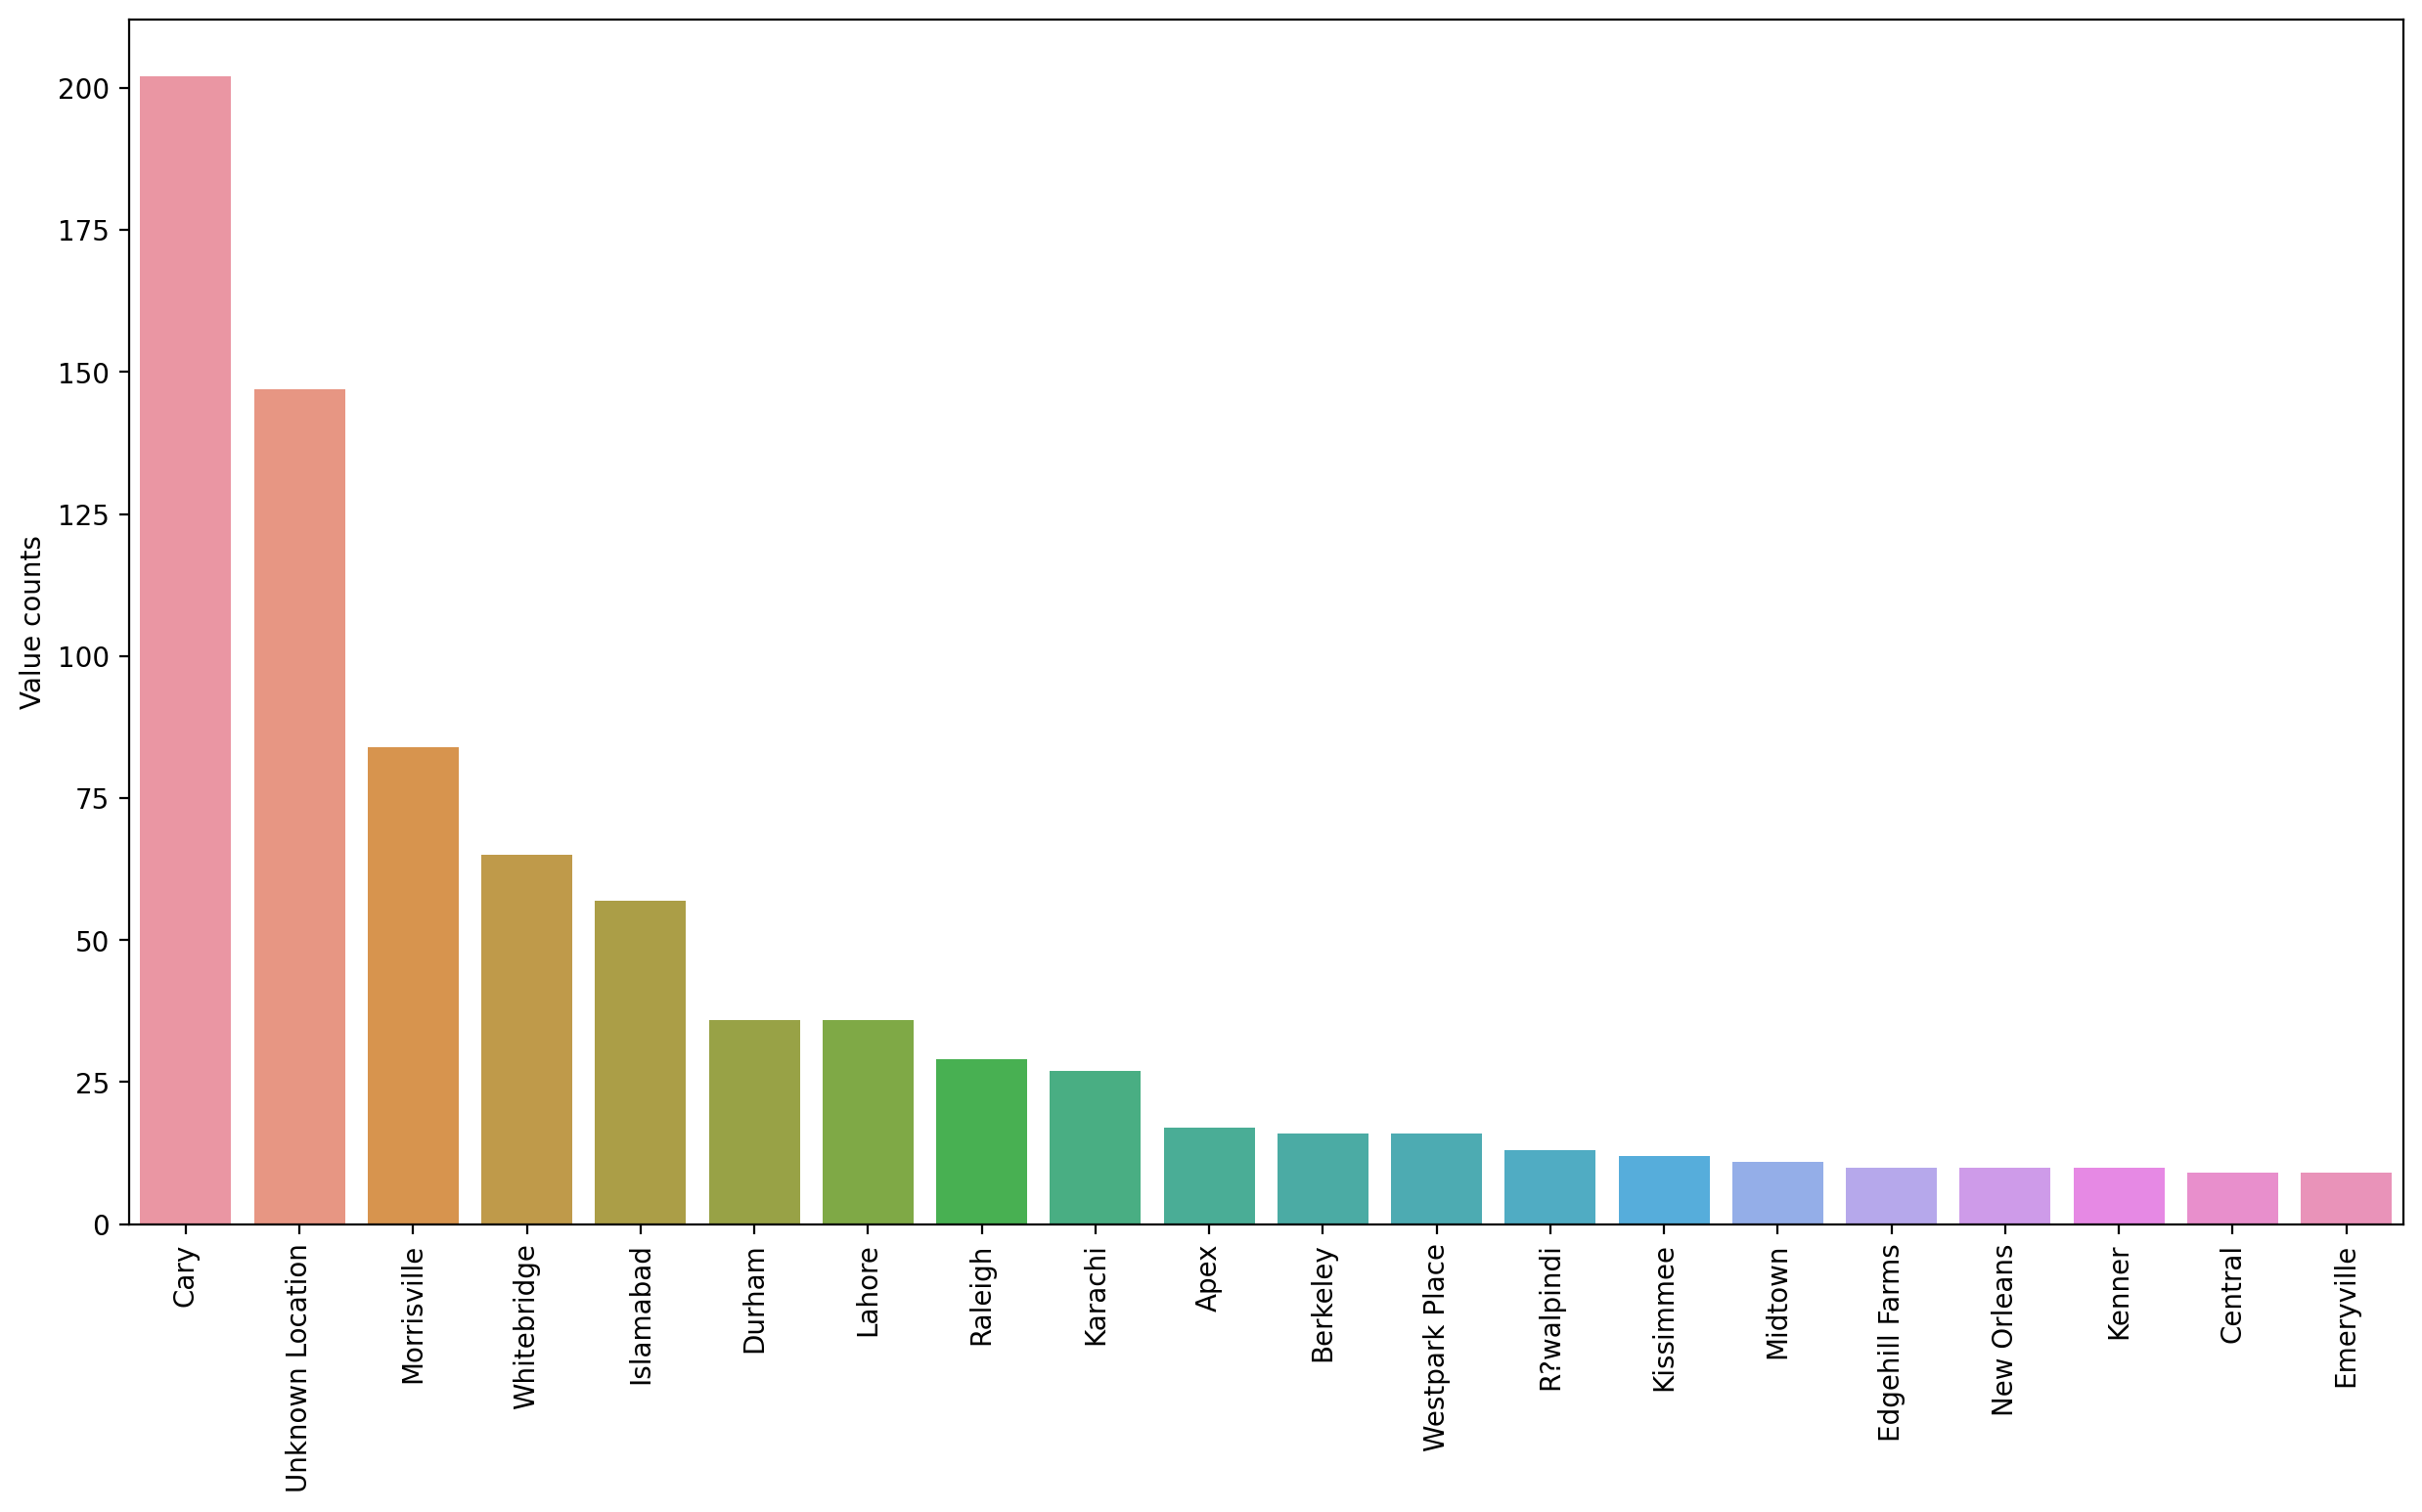

In [38]:
plt.figure(figsize=(15,8), dpi=200)
plt.xticks(rotation=90);
sns.barplot(x=popular_stop.index, y=popular_stop)
plt.ylabel('Value counts');

Now we see that `Karachi` comes up in the plots instead of the anomaly `Kar?chi`.

## Extracting the months from the column `START_DATE`

In [39]:
df['MONTH'] = df['START_DATE'].dt.month

We use the `month` function from `dt` class to extract the month from `START_DATE` column.

In [40]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MONTH
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site,12.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,12.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,12.0
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,12.0
1155,NaT,NaT,NaN,NaN,NaN,12204.7,Not Disclosed,NaN


We now get a float values of months from `START_DATE` column. We must now convert them into month names.

In [41]:
month_labels = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April', 5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug', 9.0: 'Sep',
      10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec' }
df['MONTH'] = df['MONTH'].map(month_labels)

We now map the float values to mont names using the `map` function from pandas.

In [42]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Disclosed,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Jan


## Now we see which month the rider used Uber the most using a `bar` plot after finding the travel count of each month using `value_counts`

In [43]:
month_count = df['MONTH'].value_counts()

In [44]:
month_count

Dec      146
Aug      133
Nov      122
Feb      115
Mar      113
July     112
June     107
Oct      104
Jan       61
April     54
May       49
Sep       34
Name: MONTH, dtype: int64

Text(0, 0.5, 'Value counts')

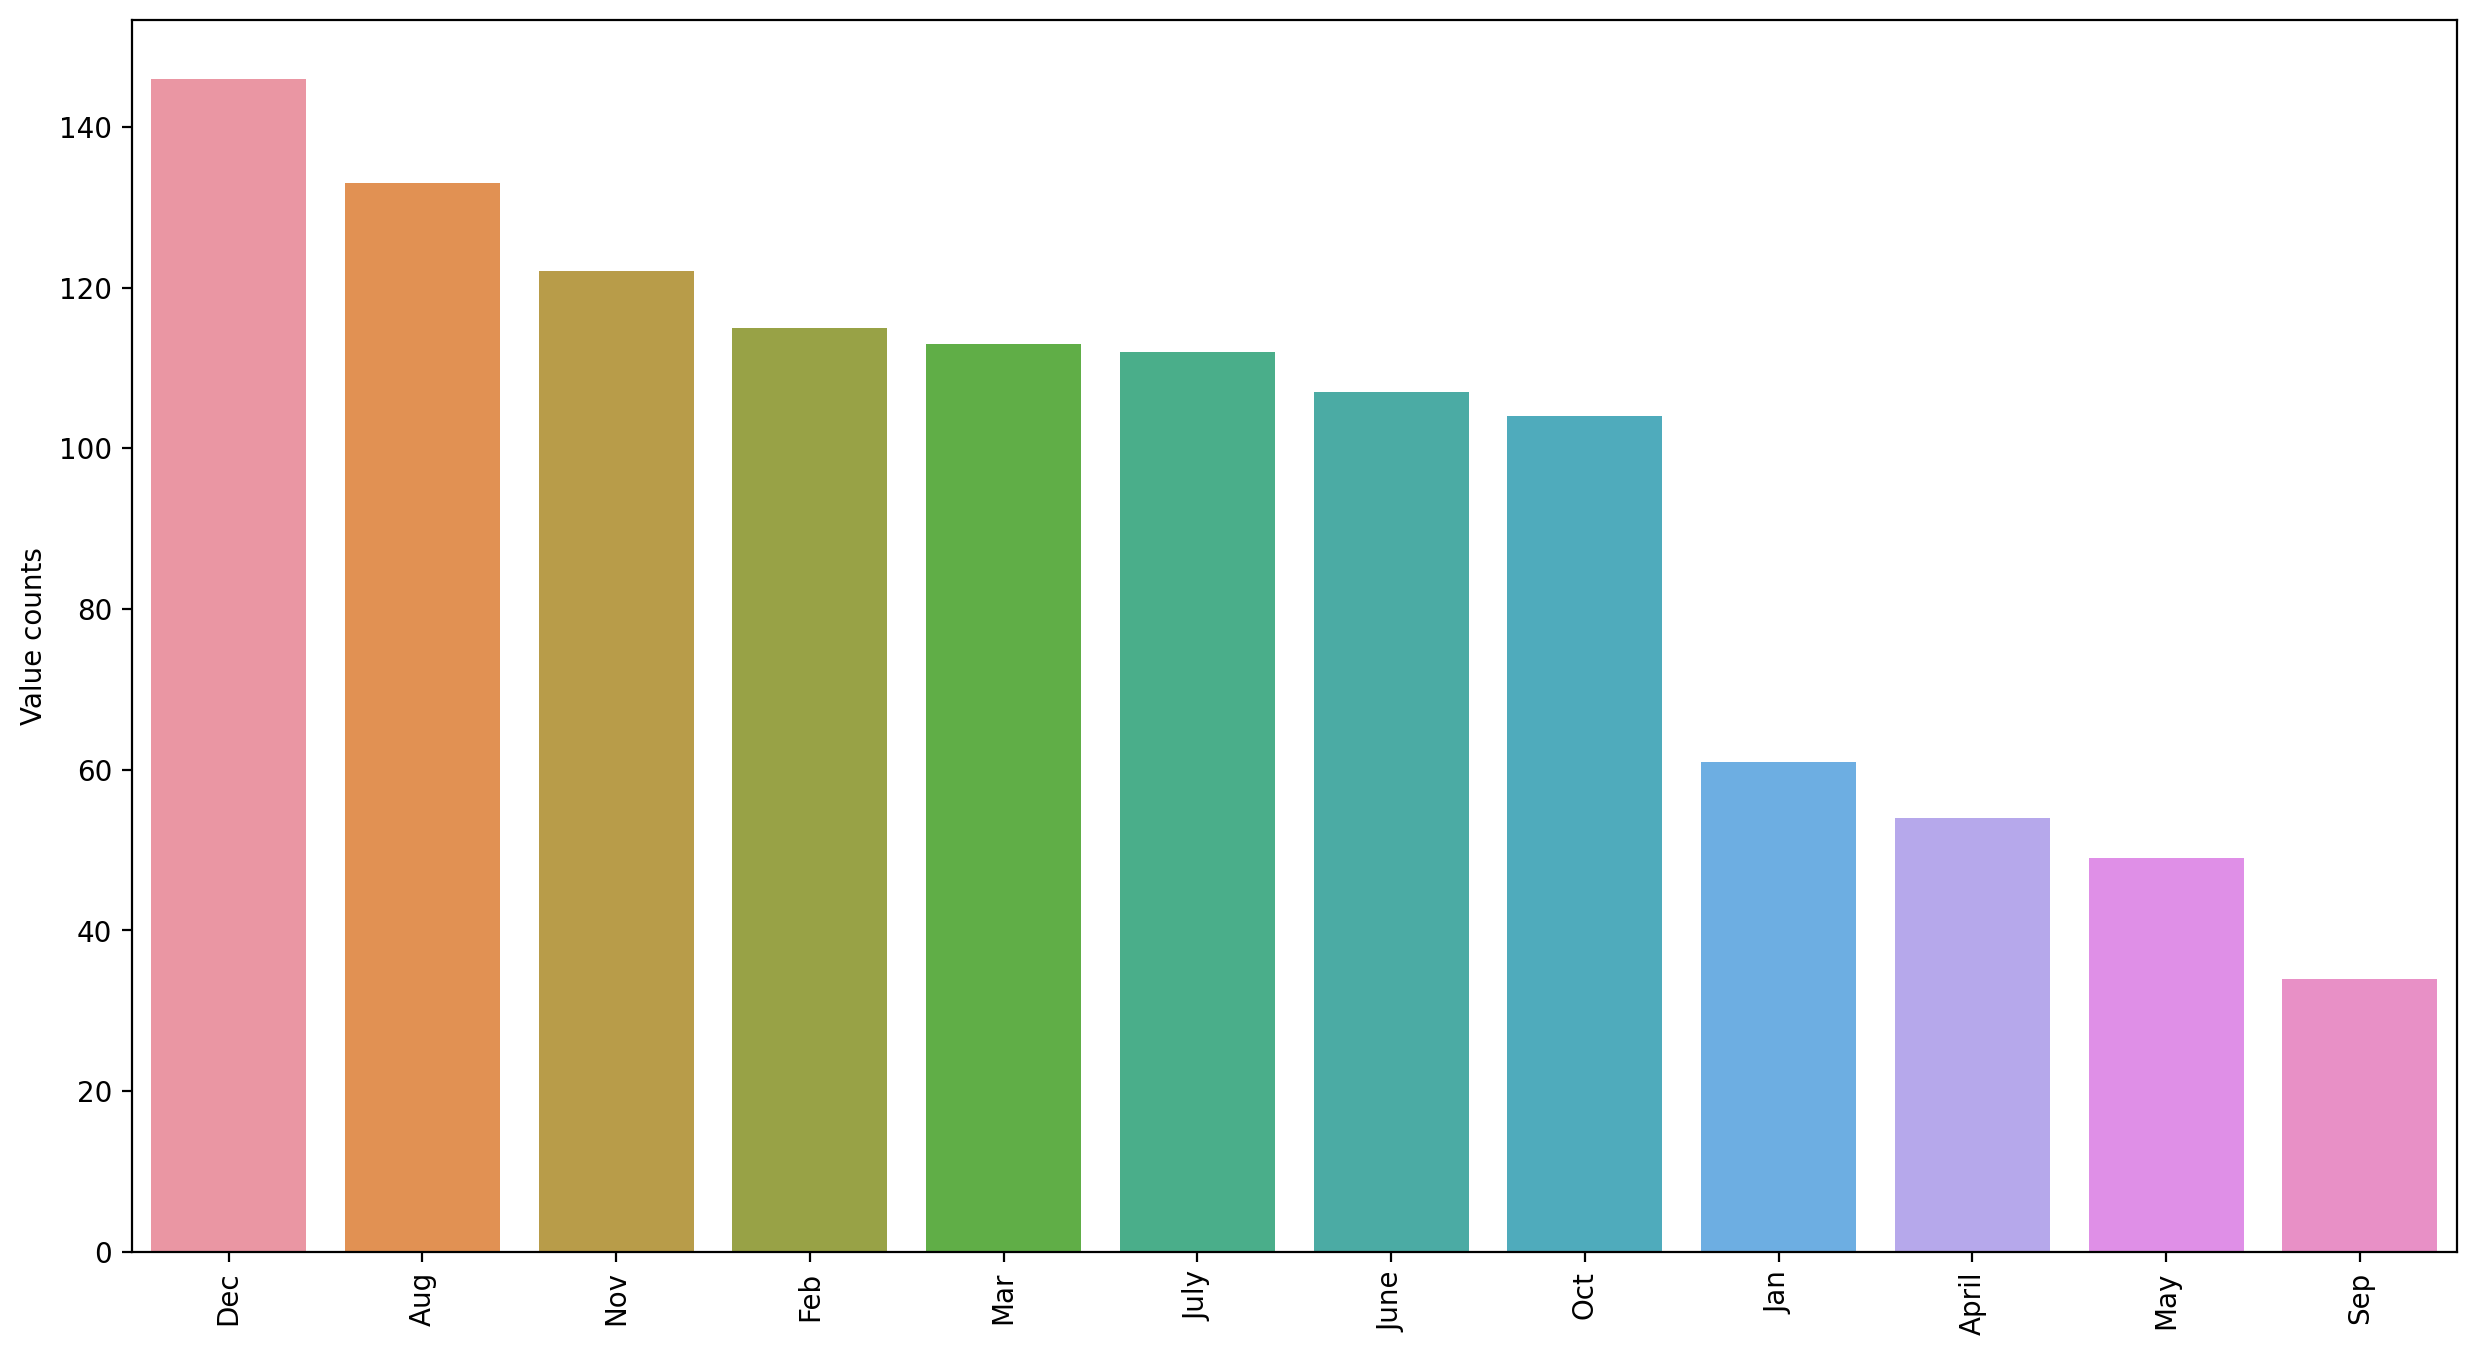

In [45]:
plt.figure(figsize=(15,8), dpi=200)
plt.xticks(rotation=90);
sns.barplot(x=month_count.index, y=month_count)
plt.ylabel('Value counts');

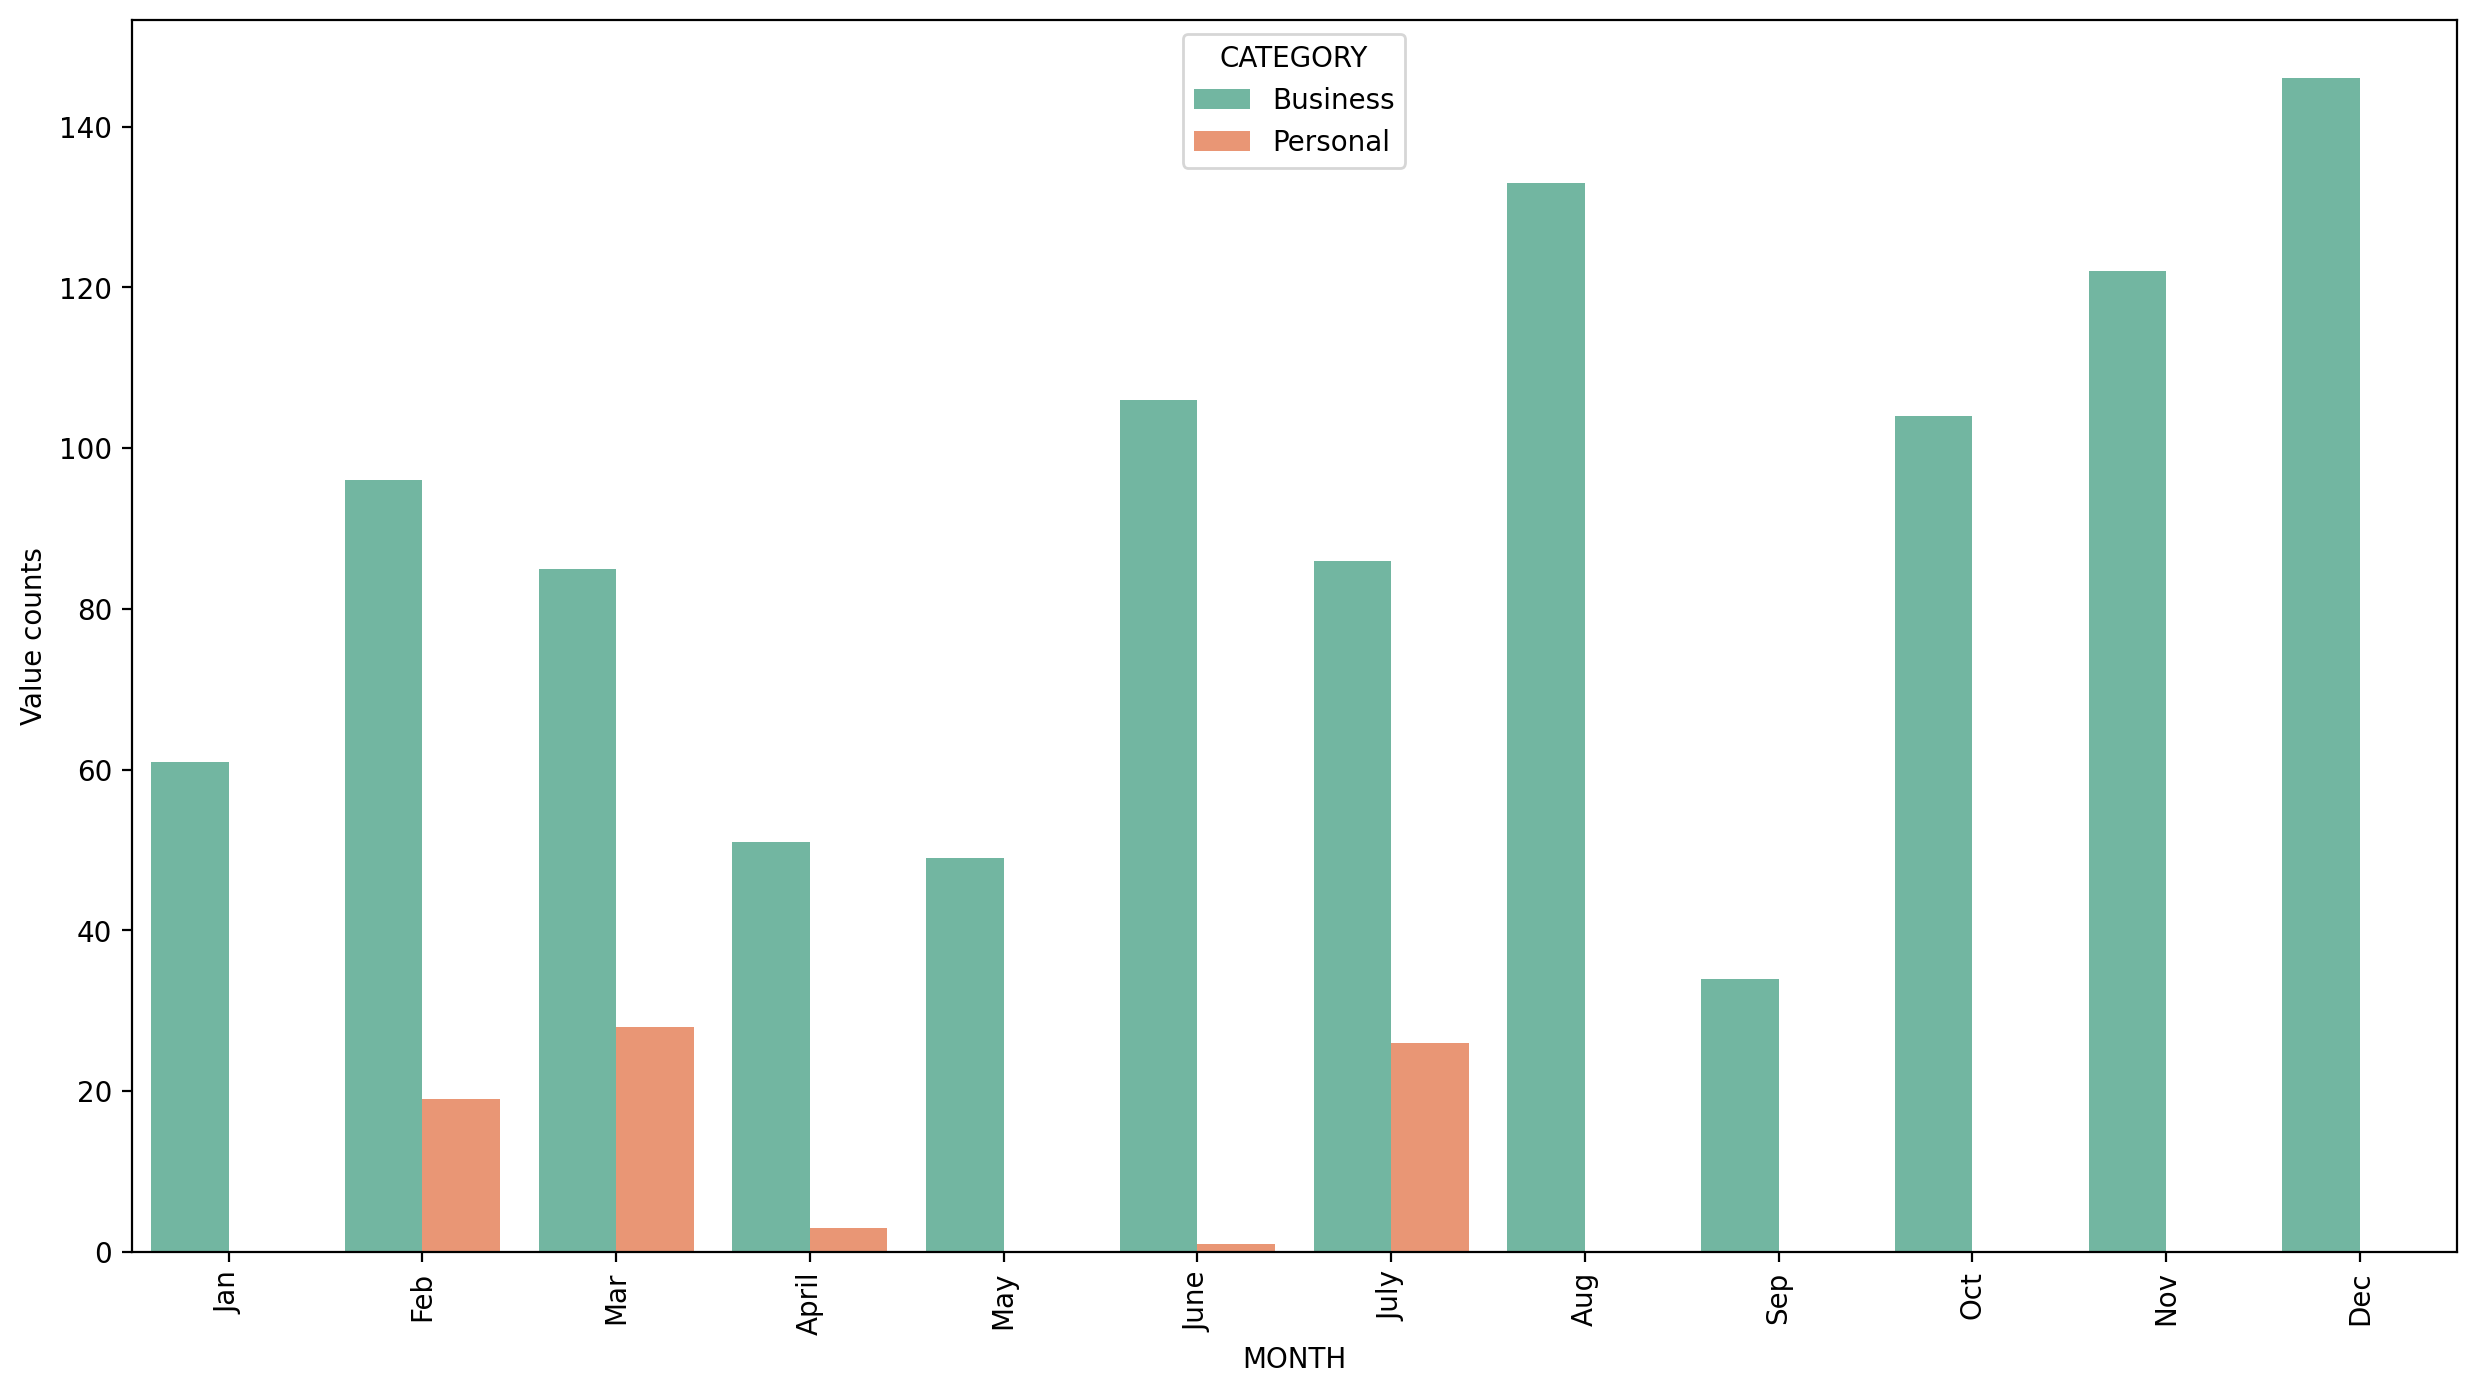

In [107]:
plt.figure(figsize=(15,8), dpi=200)
plt.xticks(rotation=90);
sns.countplot(x='MONTH', hue='CATEGORY', data=df)
plt.ylabel('Value counts');

From the above plot we see that the rider uses Uber the most during the month of **December** only for business purposes.

## Converting the continuous values of `MILES` column to interval data.

In [46]:
miles_dic = {}
for i in df['MILES']:
    if i < 10:
        if '0-10 miles' not in miles_dic:
            miles_dic['0-10 miles'] = [i]
        else:
            miles_dic['0-10 miles'].append(i)
    elif i >= 10 and i < 20:
        if '10-20 miles' not in miles_dic:
            miles_dic['10-20 miles'] = [i]
        else:
            miles_dic['10-20 miles'].append(i)
    elif i >= 20 and i < 30:
        if '20-30 miles' not in miles_dic:
            miles_dic['20-30 miles'] = [i]
        else:
            miles_dic['20-30 miles'].append(i)
    elif i >= 30 and i < 40:
        if '30-40 miles' not in miles_dic:
            miles_dic['30-40 miles'] = [i]
        else:
            miles_dic['30-40 miles'].append(i)
    elif i >= 40 and i < 50:
        if '40-50 miles' not in miles_dic:
            miles_dic['40-50 miles'] = [i]
        else:
            miles_dic['40-50 miles'].append(i)
    else:
        if 'Above 50 miles' not in miles_dic:
            miles_dic['Above 50 miles'] = [i]
        else:
            miles_dic['Above 50 miles'].append(i)

In [47]:
miles_dic

{'0-10 miles': [5.1,
  5.0,
  4.8,
  4.7,
  4.3,
  7.1,
  0.8,
  8.3,
  7.5,
  6.2,
  6.4,
  1.6,
  1.7,
  1.9,
  1.9,
  4.0,
  1.8,
  2.4,
  2.0,
  3.9,
  8.0,
  4.8,
  4.7,
  7.2,
  7.6,
  1.6,
  2.4,
  1.0,
  2.0,
  2.3,
  1.9,
  1.4,
  0.5,
  1.8,
  3.4,
  2.7,
  4.6,
  5.2,
  5.8,
  5.5,
  5.7,
  5.7,
  3.9,
  8.3,
  6.0,
  1.6,
  5.2,
  9.7,
  1.6,
  1.1,
  1.6,
  9.0,
  7.7,
  9.0,
  3.2,
  5.6,
  5.7,
  6.1,
  6.1,
  4.3,
  2.7,
  5.3,
  3.0,
  5.1,
  1.5,
  6.1,
  6.1,
  5.7,
  6.1,
  8.5,
  2.6,
  8.4,
  8.9,
  2.7,
  1.8,
  8.1,
  2.0,
  2.6,
  4.5,
  1.7,
  1.8,
  6.0,
  1.1,
  3.6,
  1.7,
  0.5,
  6.0,
  5.2,
  7.6,
  1.5,
  1.0,
  7.3,
  3.5,
  4.2,
  2.5,
  3.0,
  1.5,
  3.2,
  7.7,
  2.4,
  4.6,
  8.8,
  8.3,
  8.1,
  2.2,
  9.7,
  8.1,
  1.5,
  1.7,
  3.1,
  3.2,
  6.0,
  5.8,
  6.3,
  1.7,
  9.9,
  1.9,
  4.2,
  2.0,
  7.7,
  6.8,
  2.1,
  3.8,
  5.6,
  2.6,
  6.6,
  8.0,
  8.0,
  2.2,
  2.3,
  5.2,
  7.6,
  9.9,
  9.9,
  4.9,
  0.8,
  1.9,
  2.0,
  6.5,
  4.2,
  3.5,

In [48]:
len_miles = []
for k in miles_dic:
    len_miles.append((k, len(miles_dic[k])))

In [49]:
len_miles

[('0-10 miles', 833),
 ('Above 50 miles', 27),
 ('10-20 miles', 234),
 ('20-30 miles', 31),
 ('40-50 miles', 13),
 ('30-40 miles', 13)]

In [50]:
x, y = [], []
for a, b in len_miles:
    x.append(a)
    y.append(b)

Text(0, 0.5, 'Value counts')

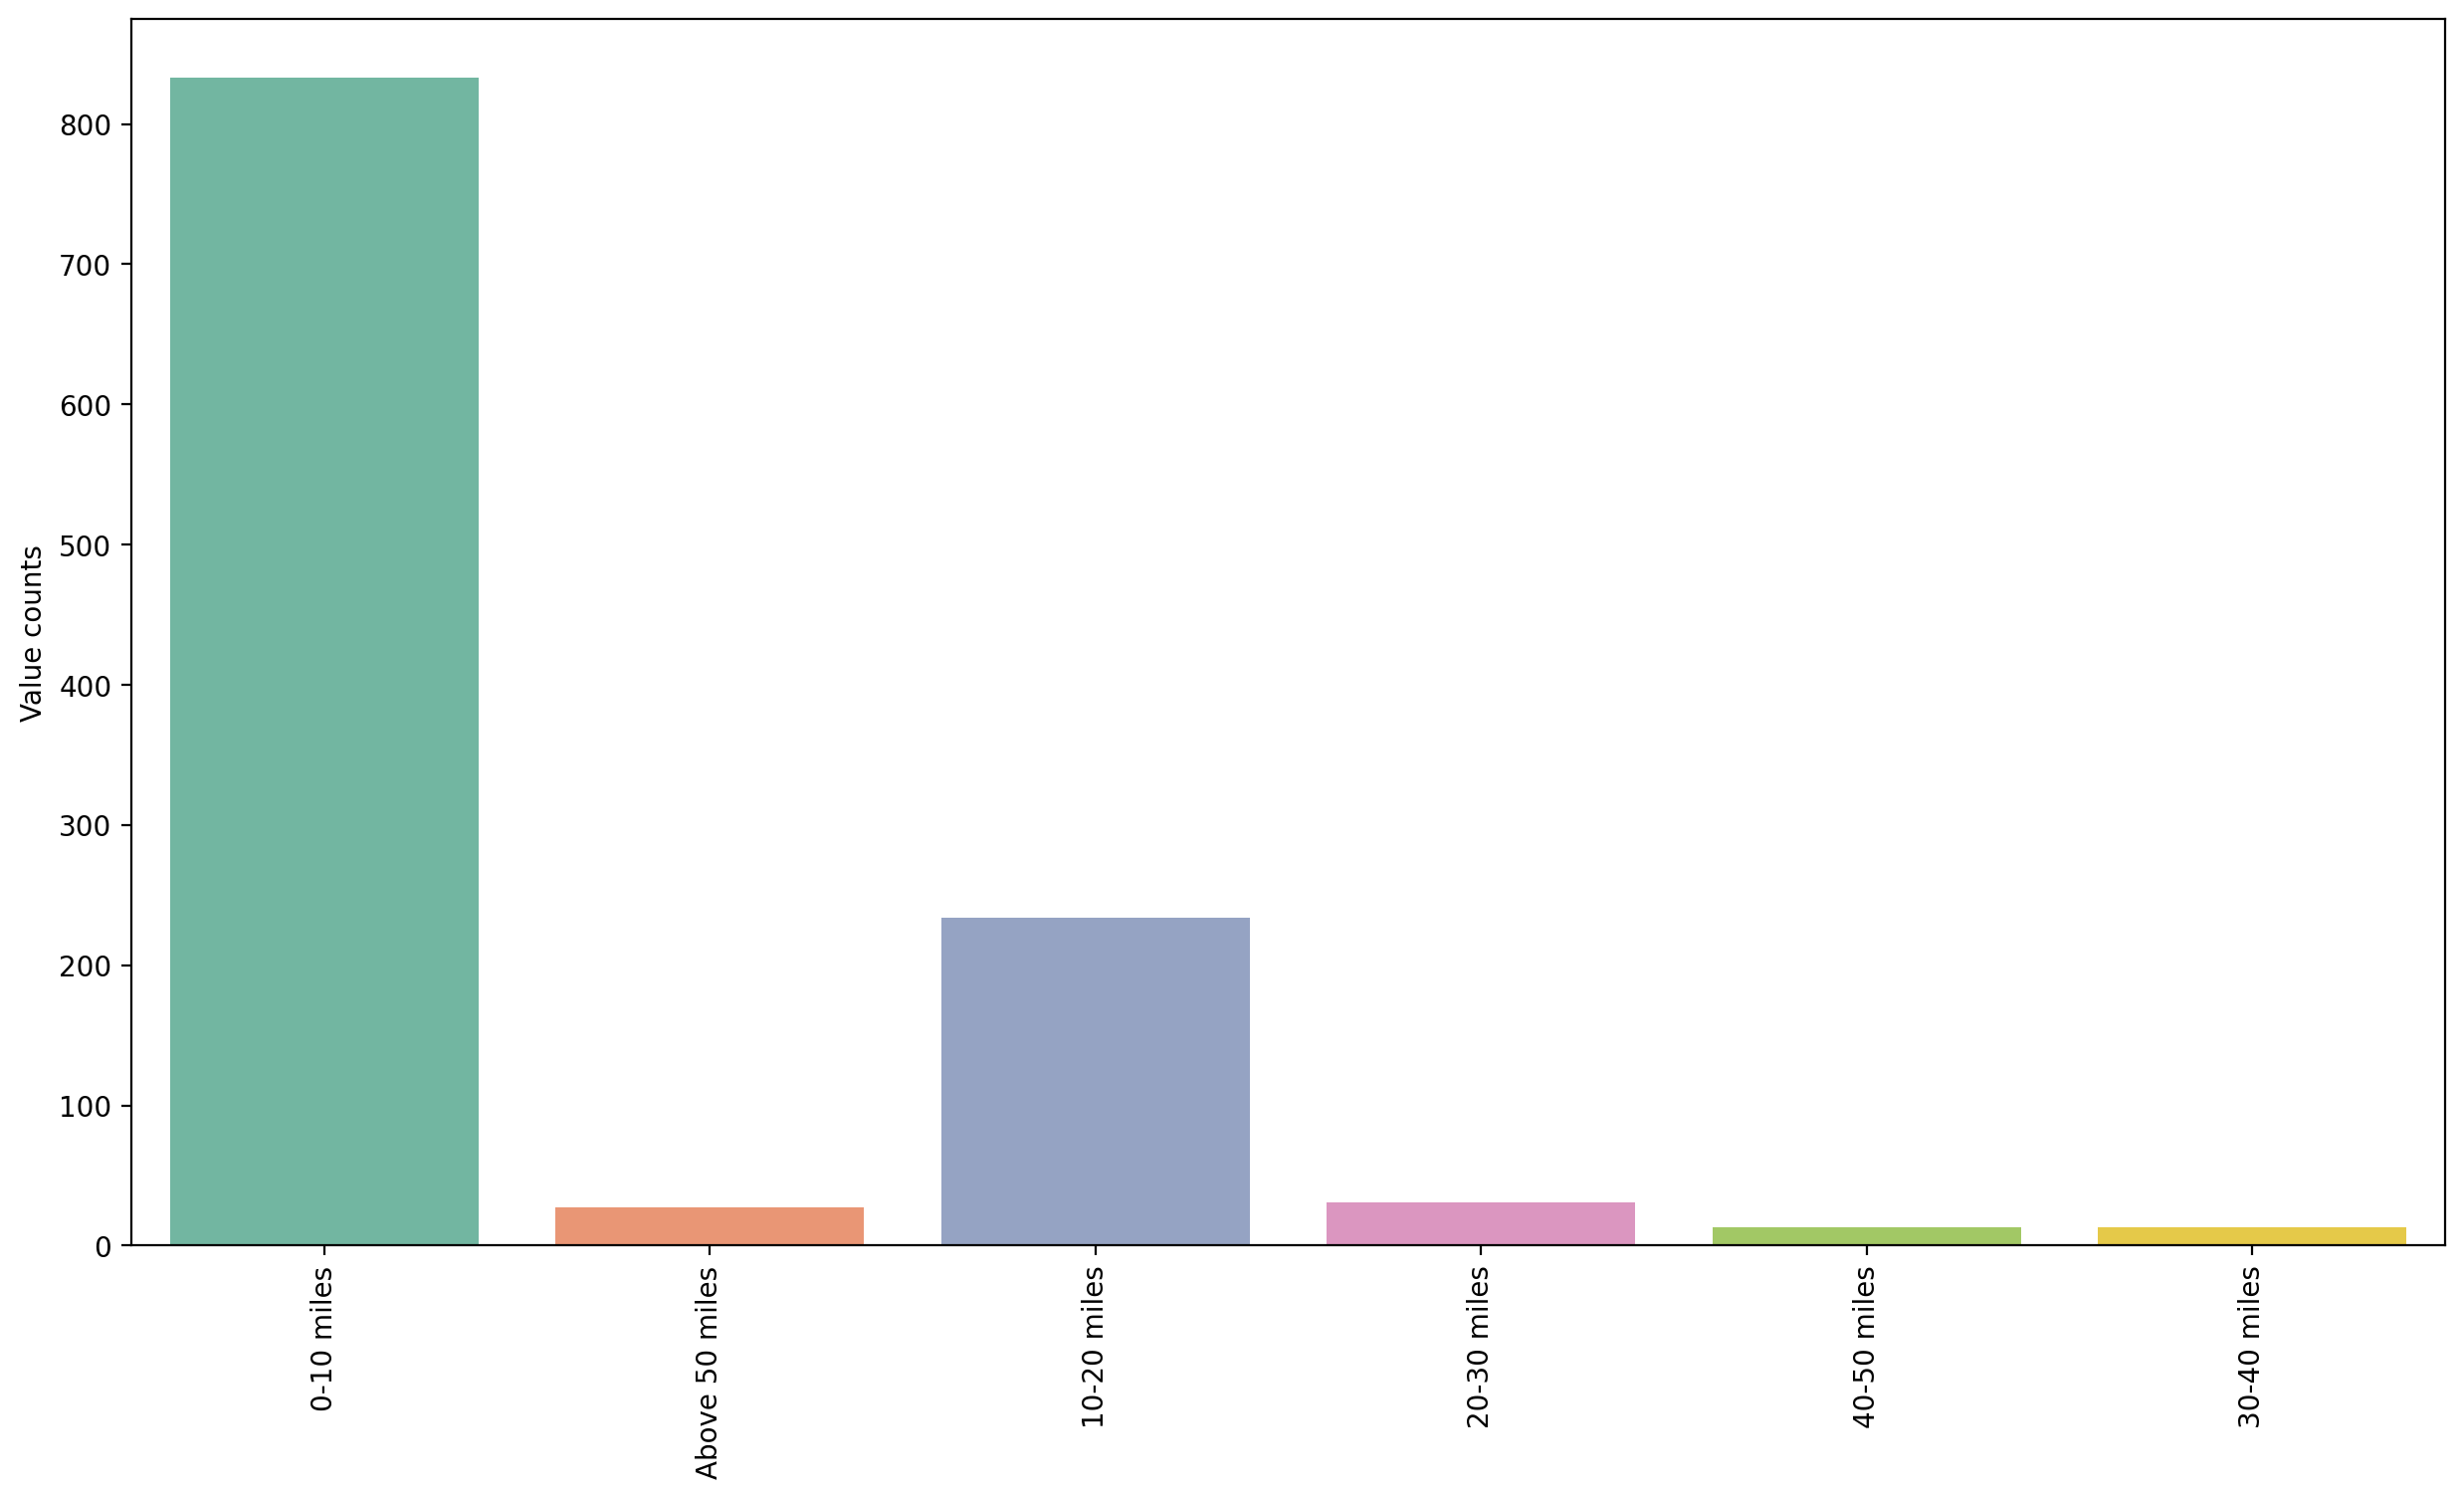

In [51]:
plt.figure(figsize=(15,8), dpi=200)
plt.xticks(rotation=90);
sns.barplot(x=x, y=y)
plt.ylabel('Value counts');

## We now compare the number of rides that were taken during the day and night by using a `bar plot`
* We can do this by getting the `START_DATE` column and then applying the `dt.time` attribute to get the time and then applying it to a custom function by using the `apply` function.
* To prevent any errors we drop the null values.
* If `time > '18:00:00'` Night `else` Day


In [60]:
t = pd.to_datetime(['18:00:00']).time

In [76]:
df = df.dropna()

In [68]:
def check_time(time):
    if time < t:
        return 'Day Ride'
    else:
        return 'Night Ride'

In [78]:
df['DAY/NIGHT'] = df['START_DATE'].dt.time.apply(check_time)

In [81]:
ride_time = df['DAY/NIGHT'].value_counts()

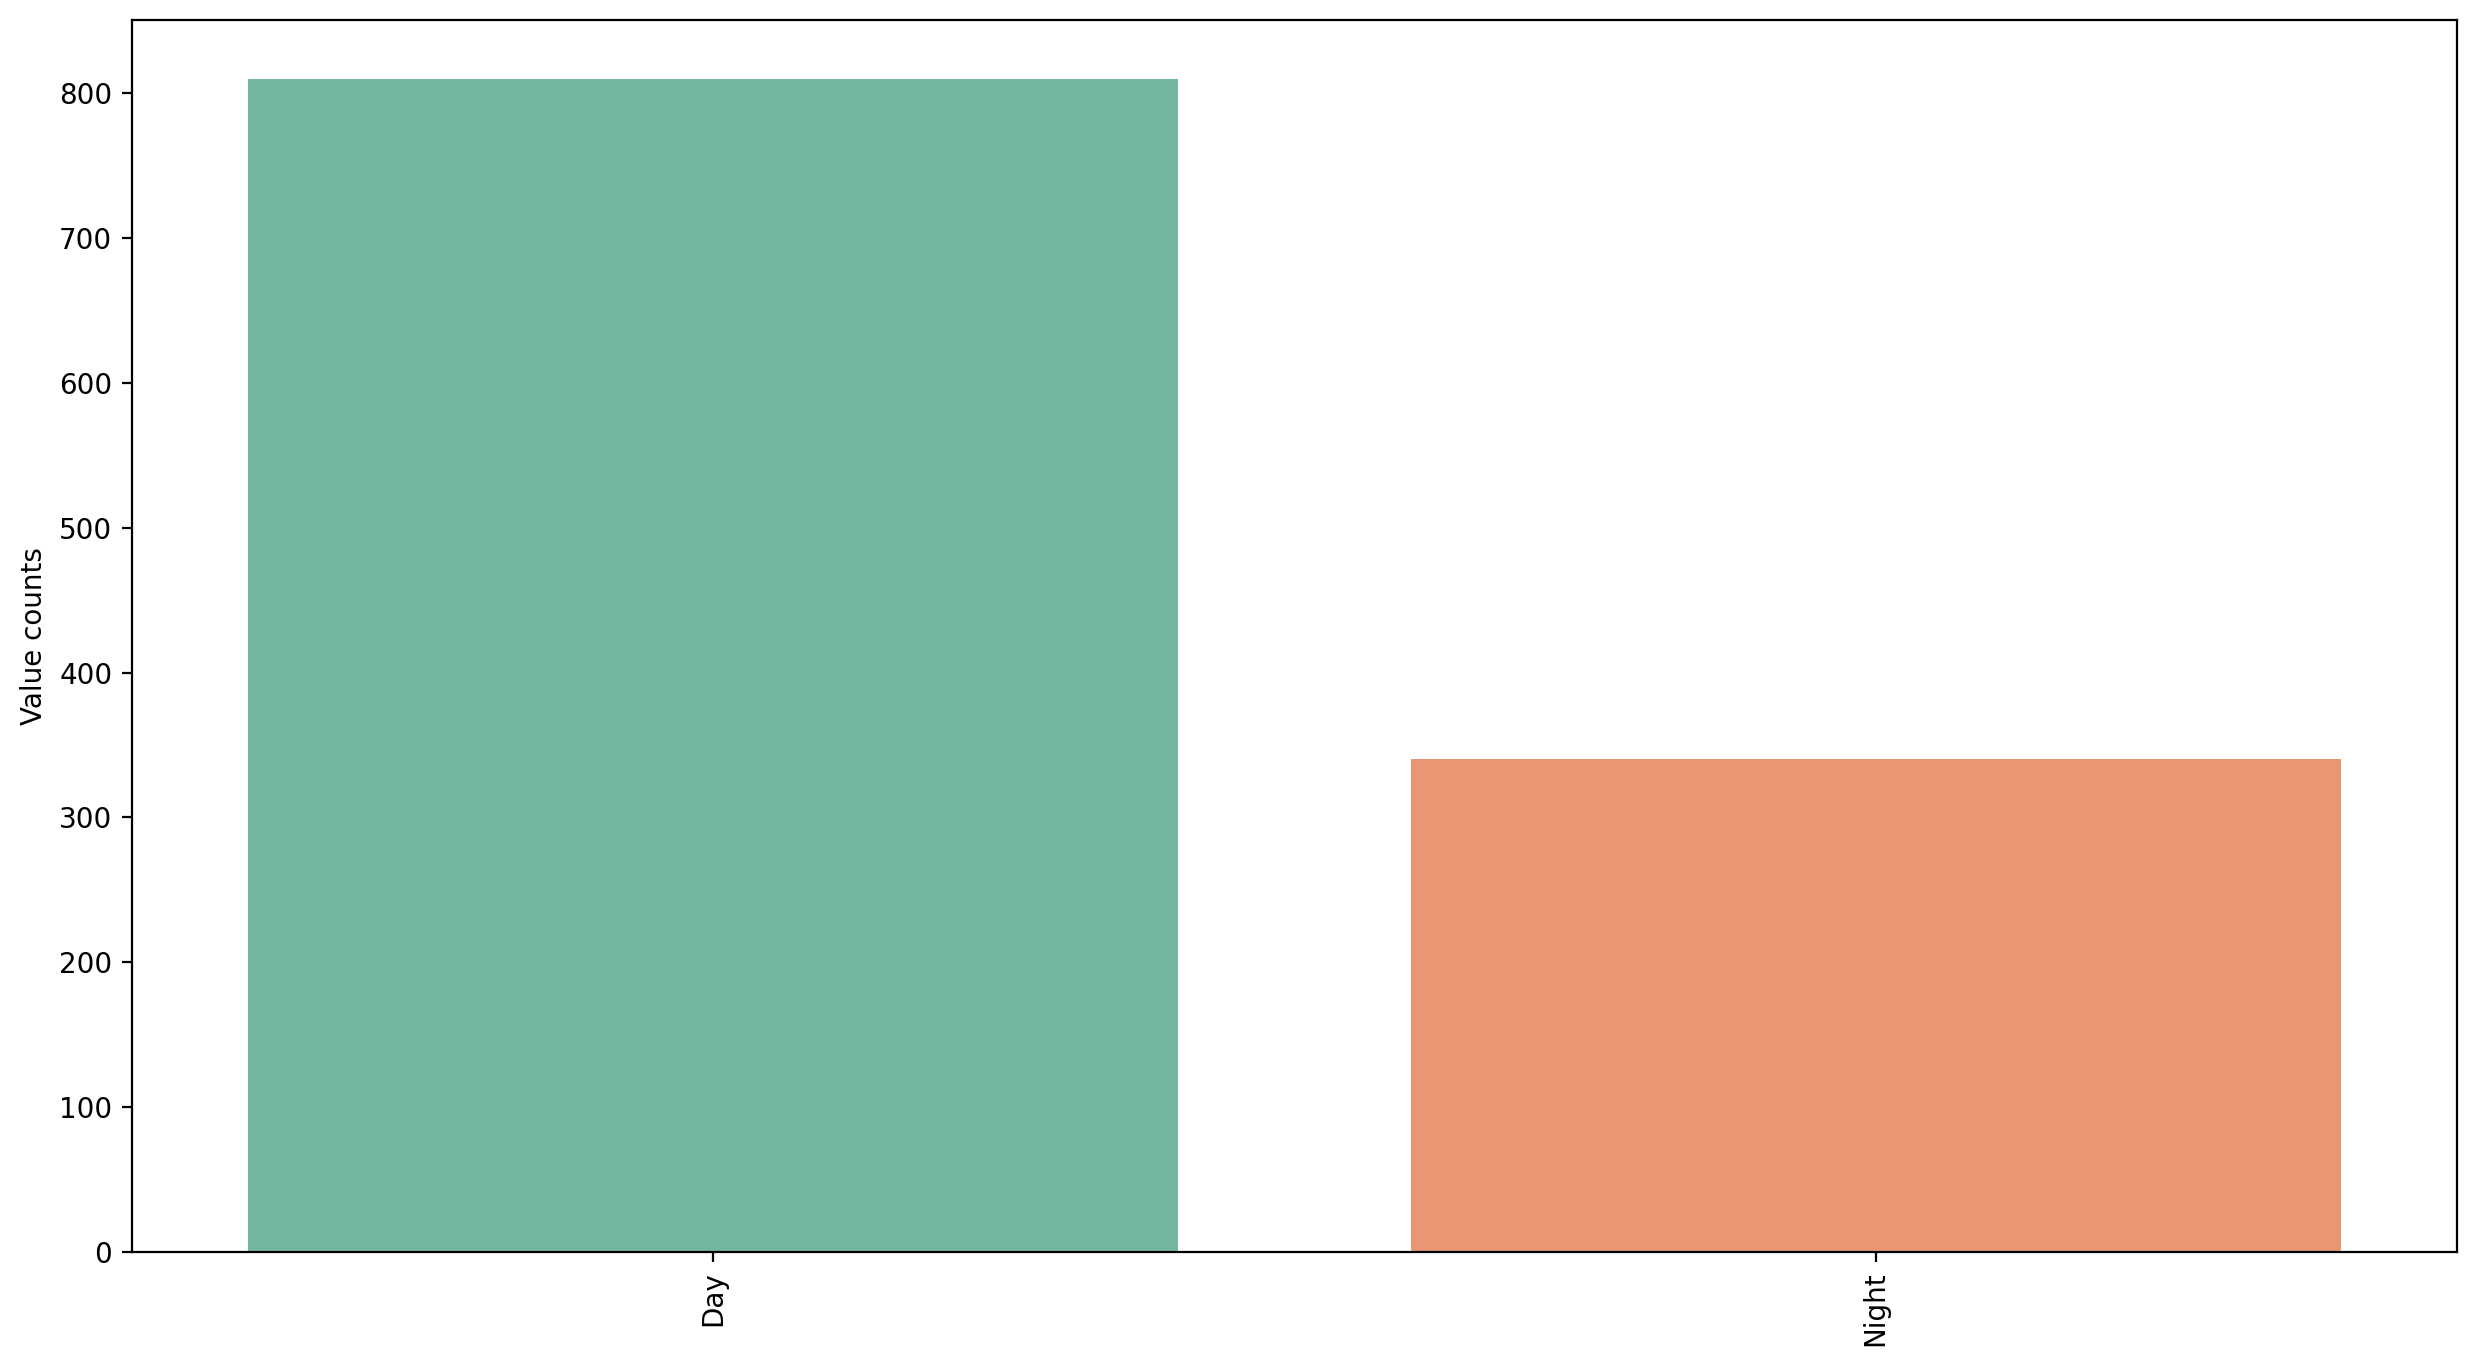

In [84]:
plt.figure(figsize=(15,8), dpi=200)
plt.xticks(rotation=90);
sns.barplot(x=ride_time.index, y=ride_time)
plt.ylabel('Value counts');

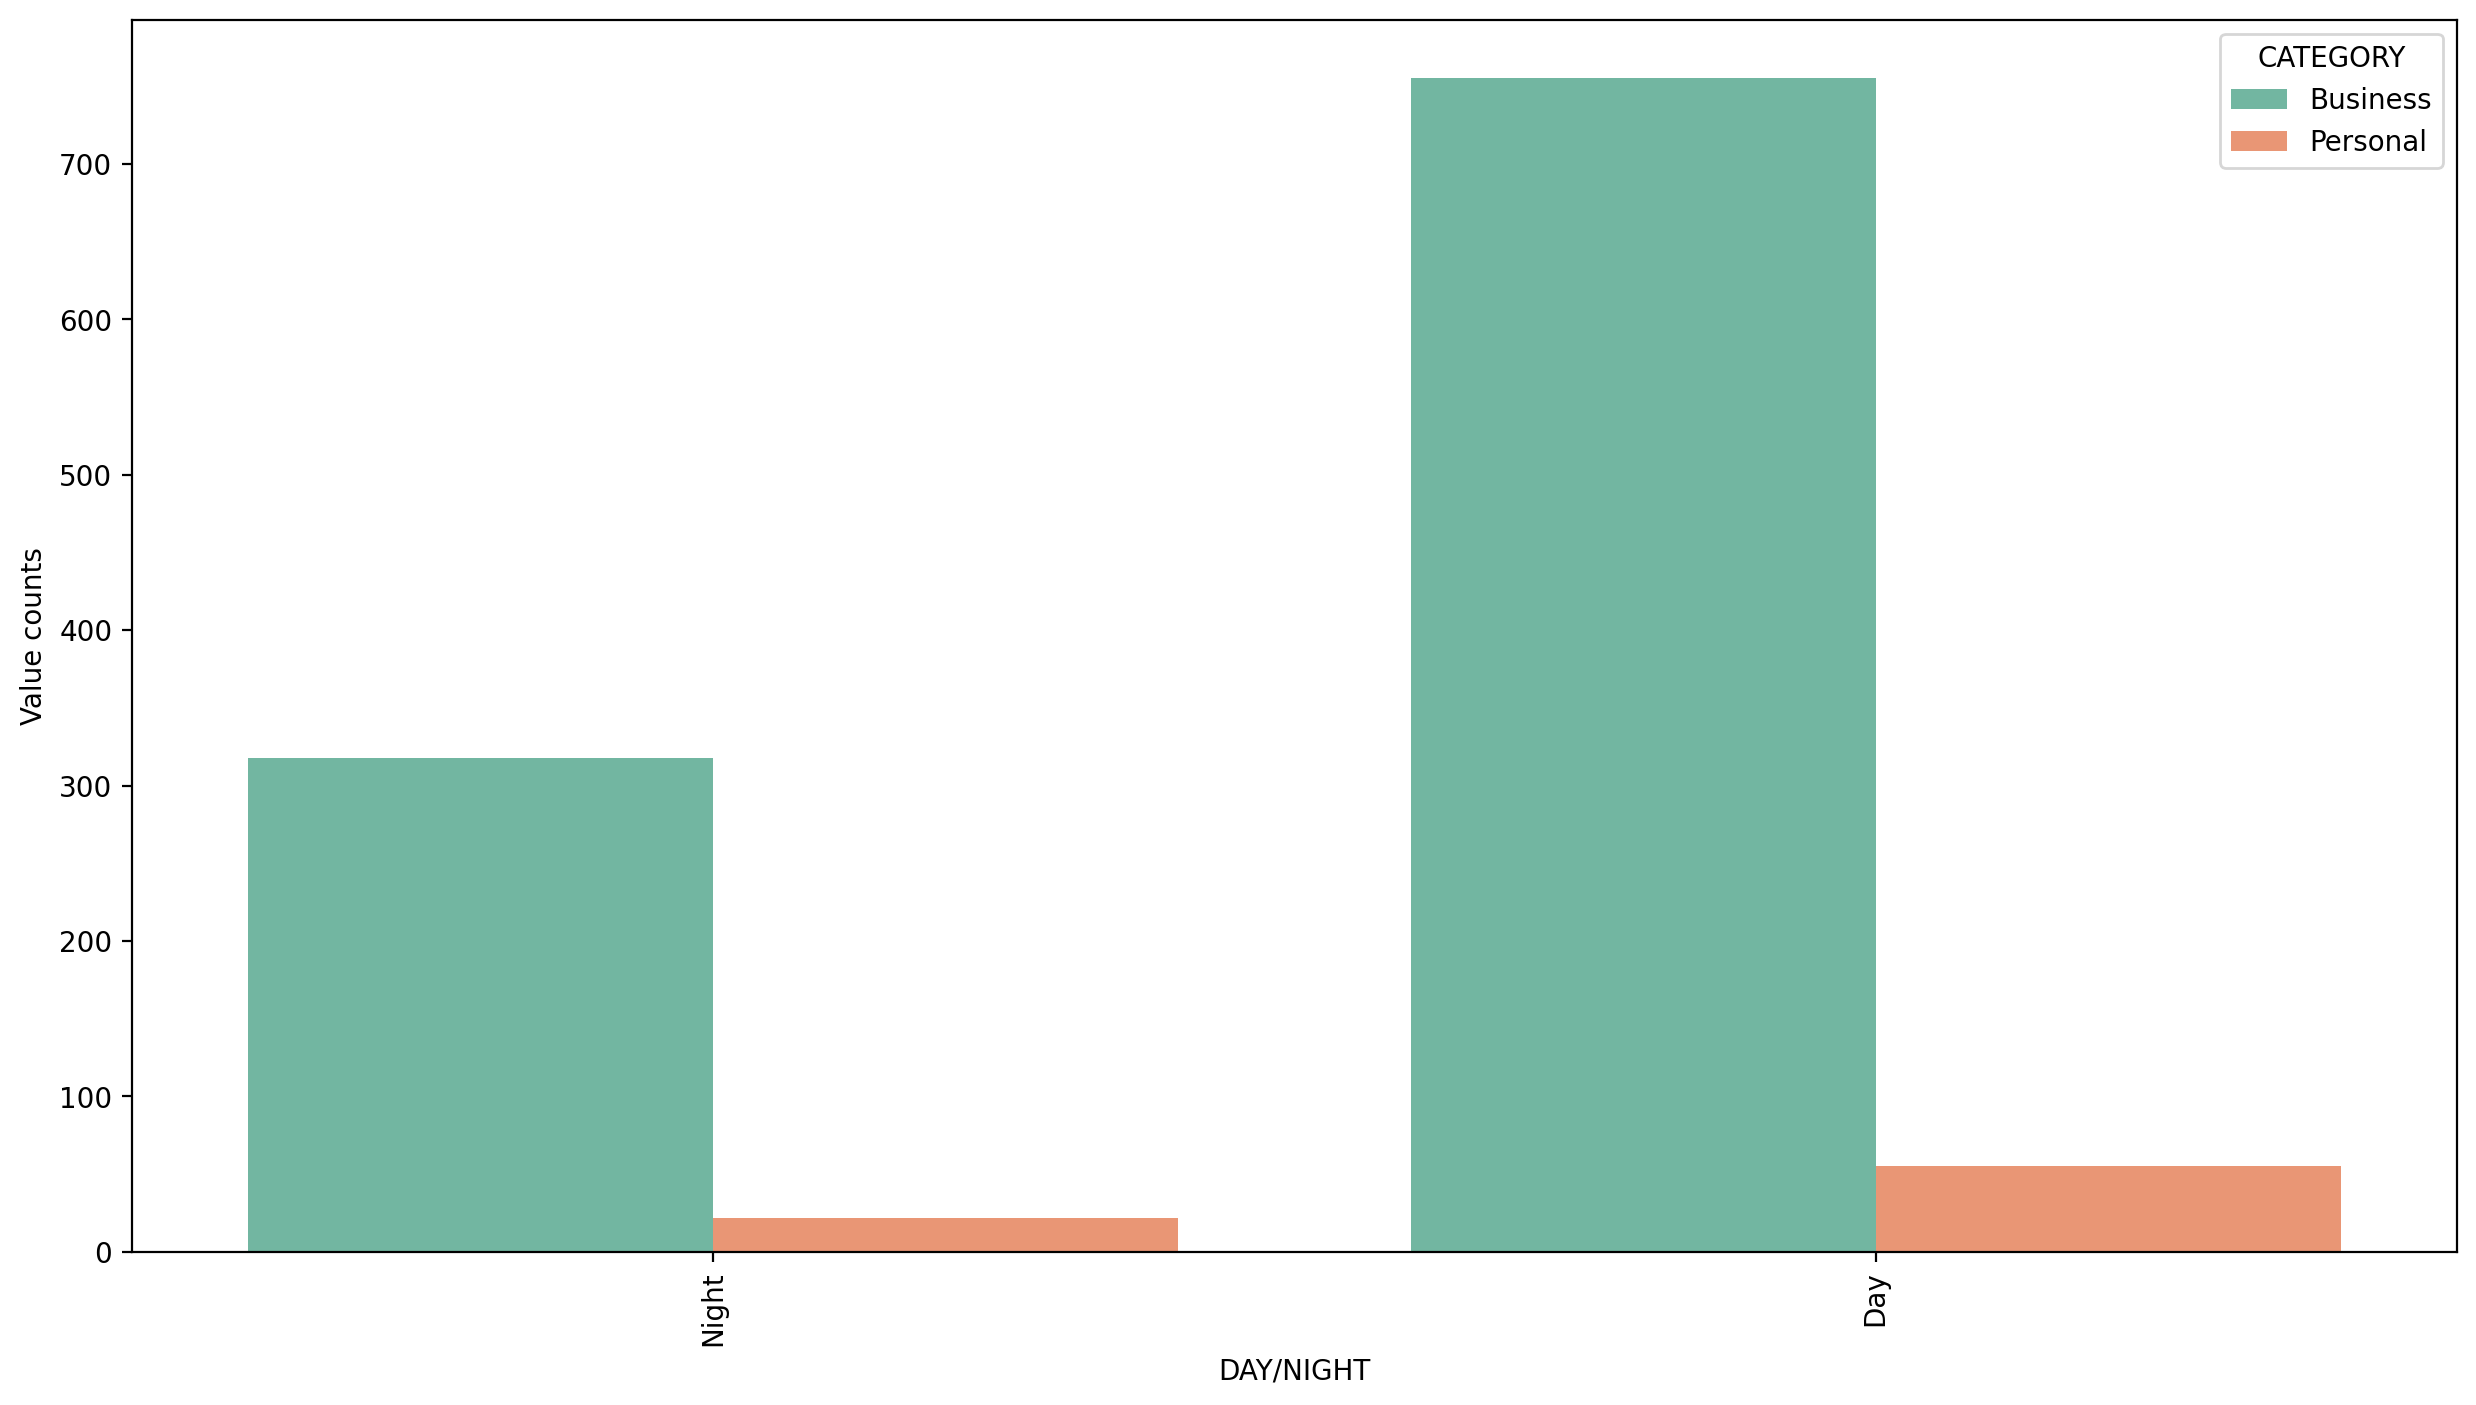

In [106]:
plt.figure(figsize=(15,8), dpi=200)
plt.xticks(rotation=90);
sns.countplot(x='DAY/NIGHT', hue='CATEGORY', data=df)
plt.ylabel('Value counts');

From the above plot we can see that the rider used uber mostly during the day rather than night for business purposes

## We now compare on which day the rider used uber the most with the help of the `dt.weekday` function and then plot it on a `bar plot`

In [85]:
df['WEEKDAY'] = df['START_DATE'].dt.weekday

In [86]:
day_labels = {0 : 'Mon', 1 : 'Tues', 2 : 'Wed', 3 : 'Thurs', 4 : 'Fri', 5 : 'Sat', 6 : 'Sun'}

In [87]:
df['WEEKDAY'] = df['WEEKDAY'].map(day_labels)

In [88]:
day_counts = df['WEEKDAY'].value_counts()

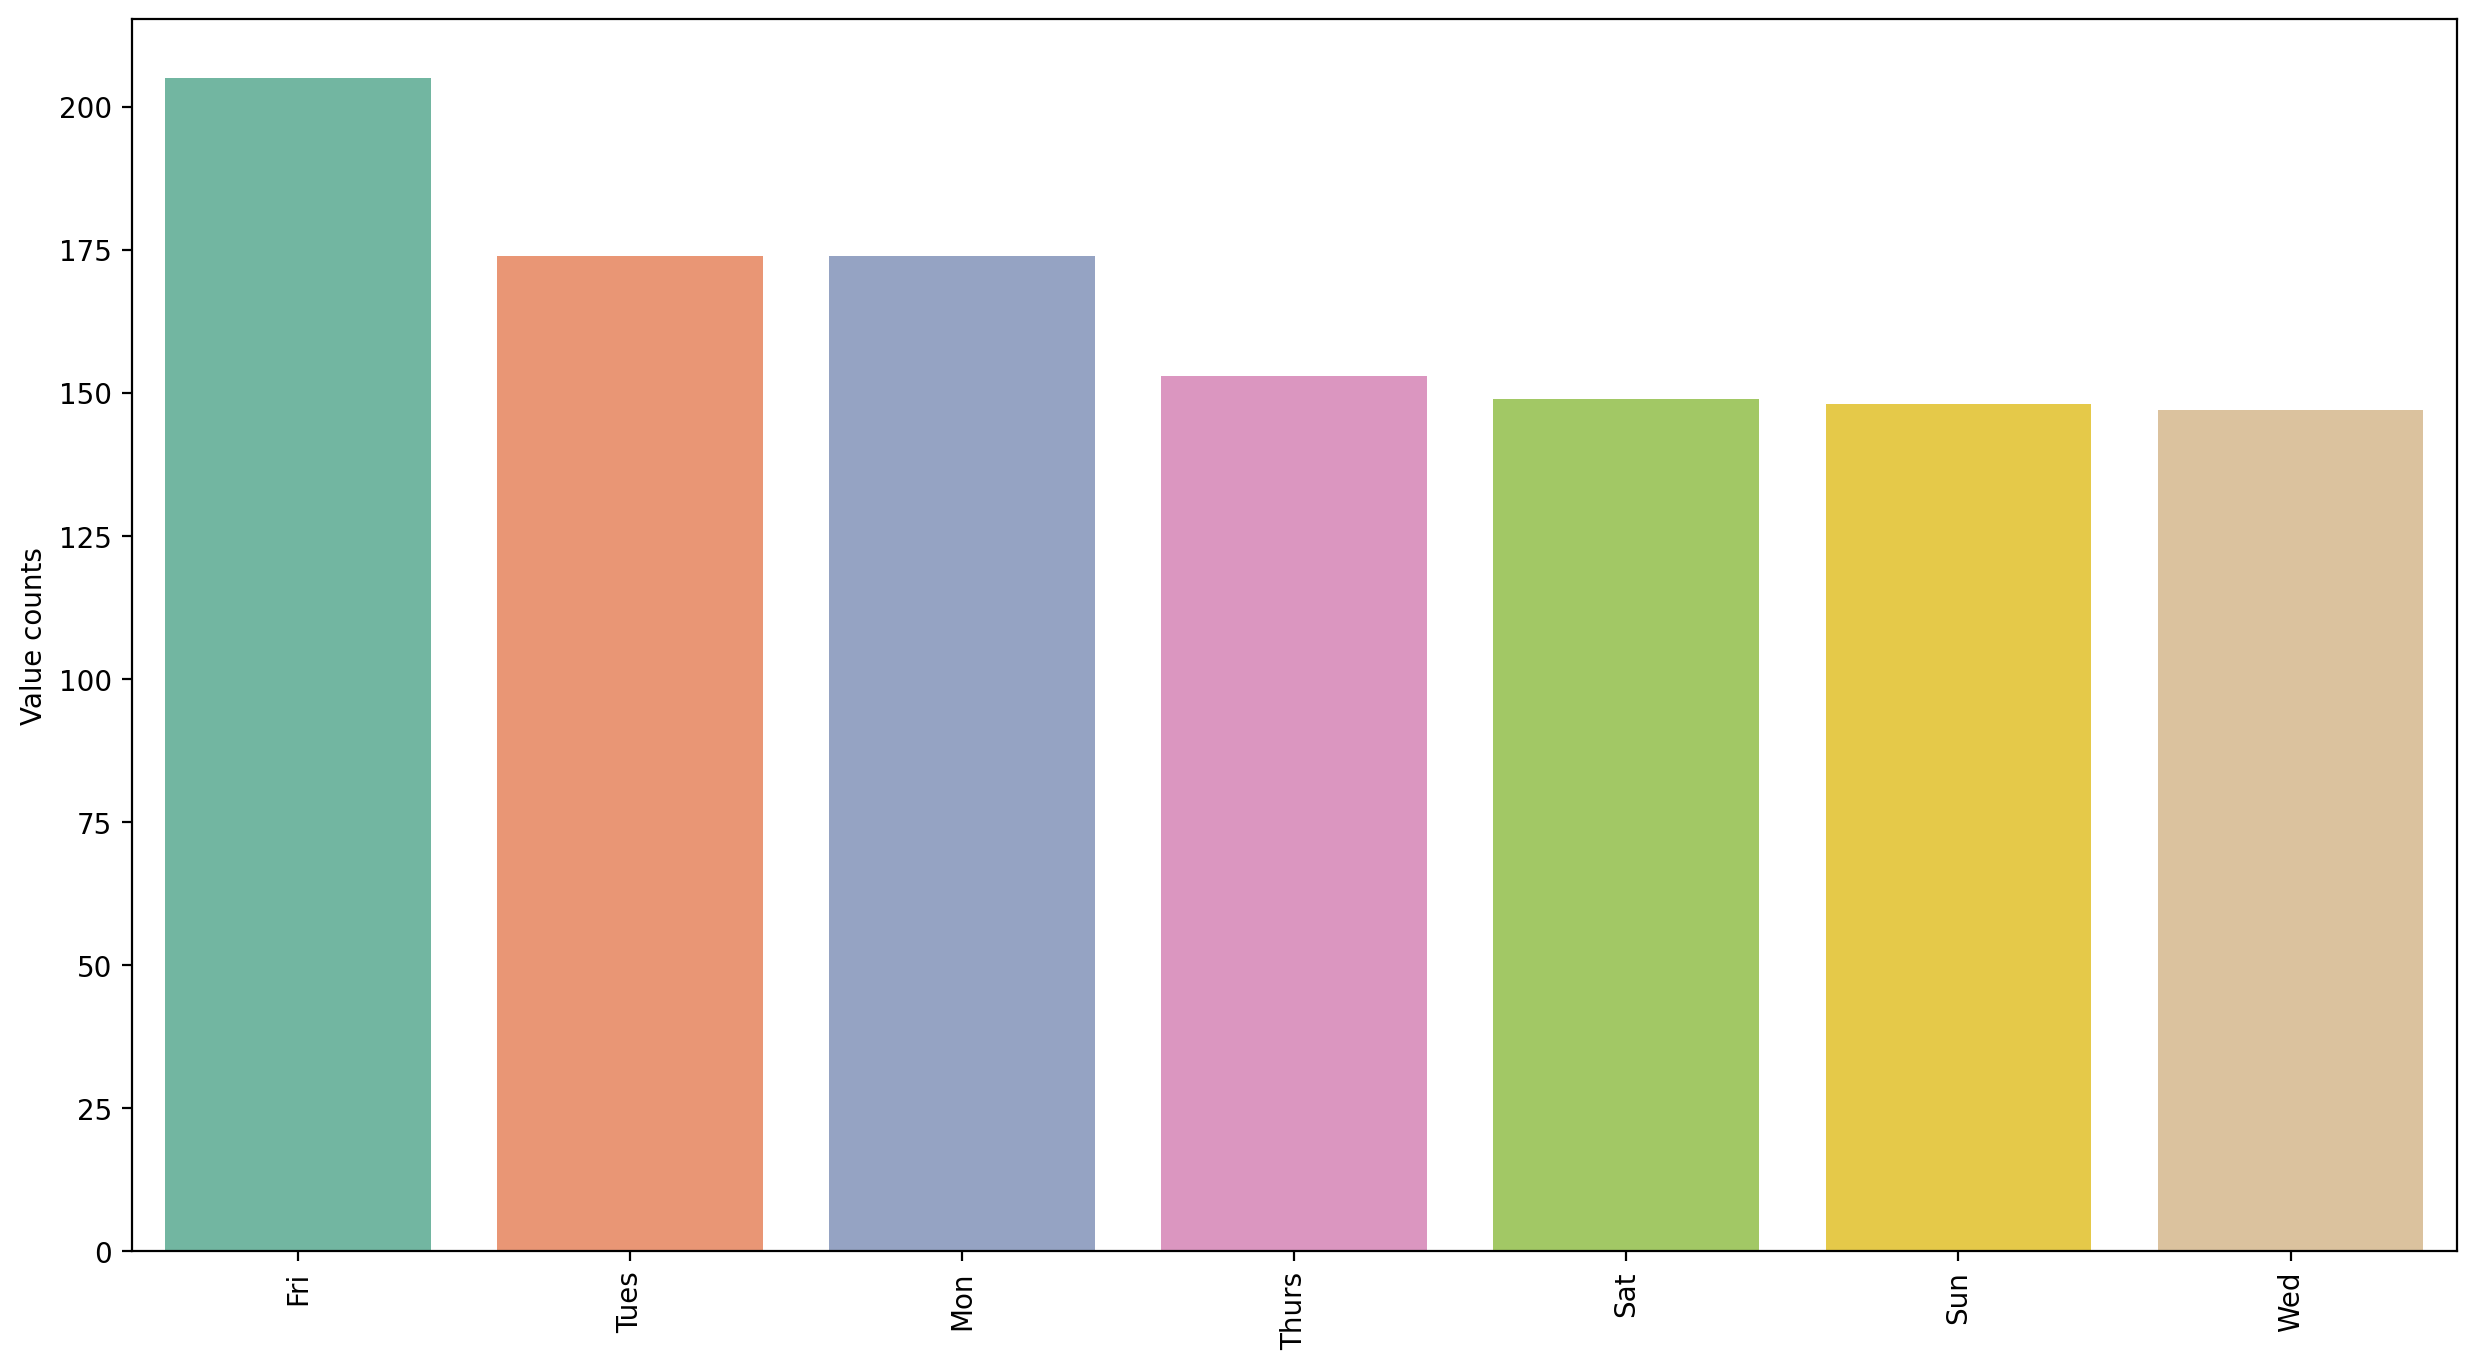

In [89]:
plt.figure(figsize=(15,8), dpi=200)
plt.xticks(rotation=90);
sns.barplot(x=day_counts.index, y=day_counts)
plt.ylabel('Value counts');

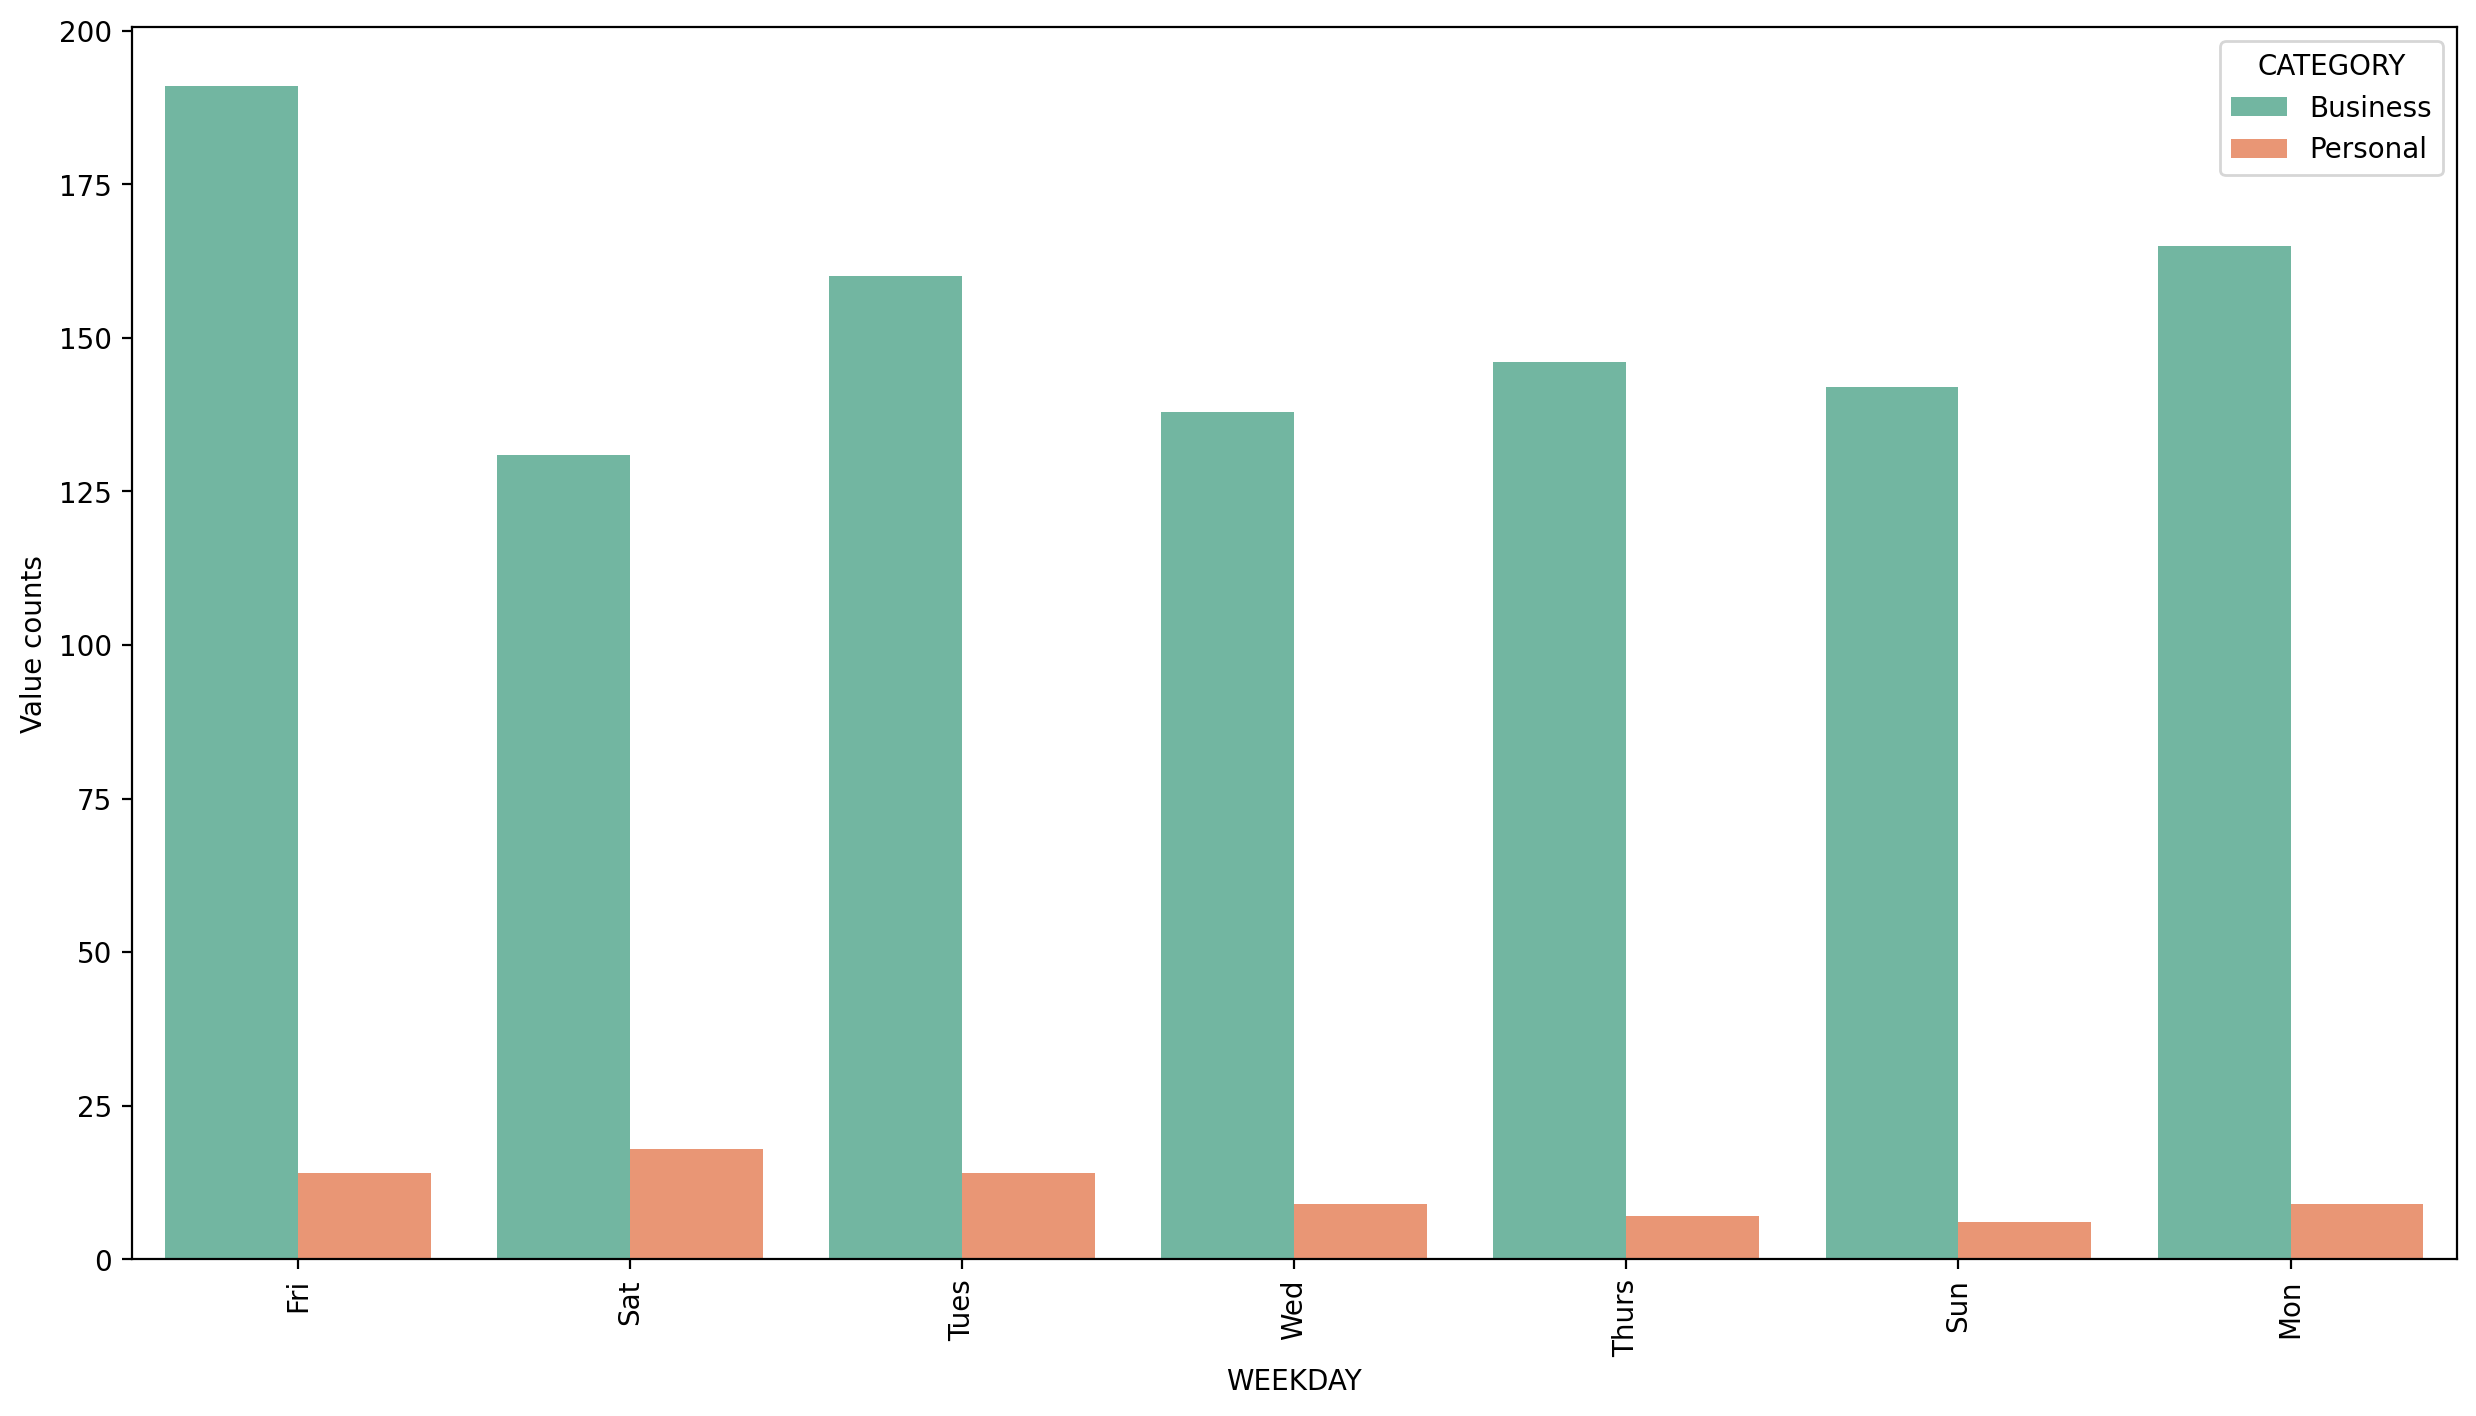

In [105]:
plt.figure(figsize=(15,8), dpi=200)
plt.xticks(rotation=90);
sns.countplot(x='WEEKDAY', hue='CATEGORY', data=df)
plt.ylabel('Value counts');

From the above plots we can see that the rider used the cab mostly on fridays followed by tuesdays for business purposes

## We now compare the different times the rider takes uber using `dt.hour` function and plotting it by using a `bar plot`

In [97]:
df['HOUR'] = df['START_DATE'].dt.hour

In [96]:
time_labels = {0 : '12:00 AM', 1 : '01:00 AM', 2 : '02:00 AM', 3 : '03:00 AM', 4 : '04:00 AM', 5 : '05:00 AM', 6 : '06:00 AM',
              7 : '07:00 AM', 8 : '07:00 AM', 9 : '09:00 AM', 10 : '10:00 AM', 11 : '11:00 AM', 12 : '12:00 PM', 
              13 : '01:00 PM', 14 : '02:00 PM', 15 : '03:00 PM', 16 : '04:00 PM', 17 : '05:00 PM', 18 : '06:00 PM',
              19 : '07:00 PM', 20 : '08:00 PM', 21 : '09:00 PM', 22 : '10:00 PM', 23 : '11:00 PM'}

In [98]:
df['HOUR'] = df['HOUR'].map(time_labels)

In [100]:
time_count = df['HOUR'].value_counts()

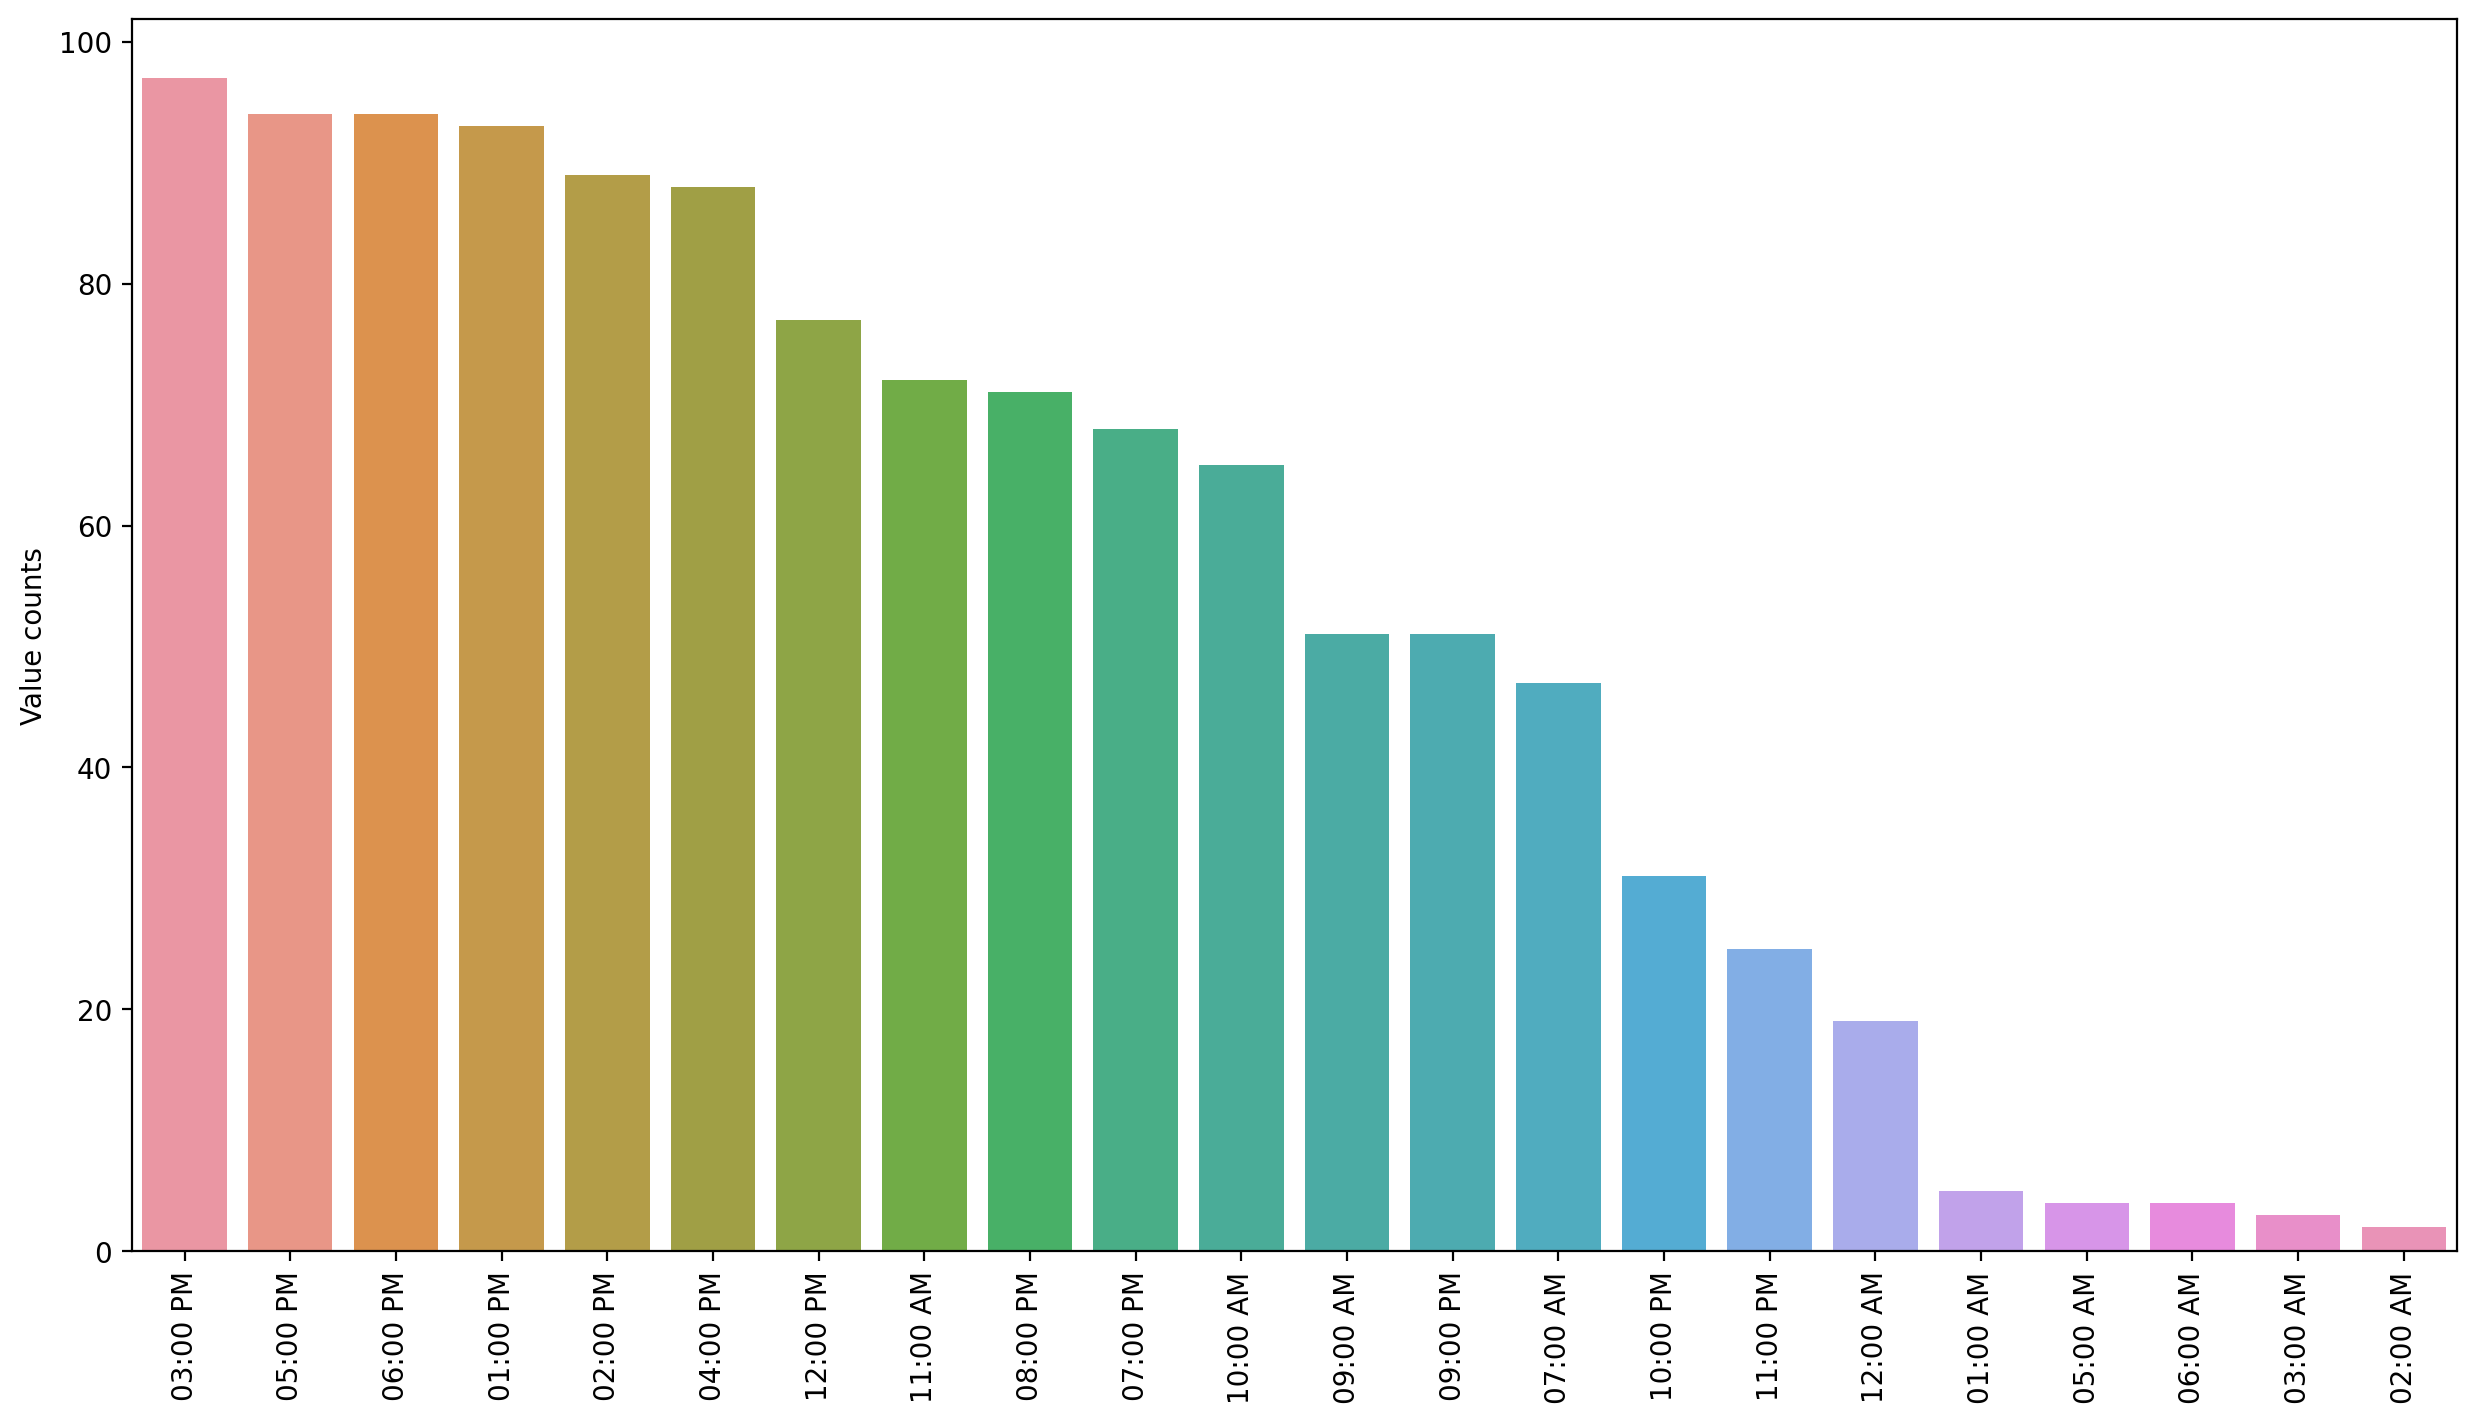

In [103]:
plt.figure(figsize=(15,8), dpi=200)
plt.xticks(rotation=90);
sns.barplot(x=time_count.index, y=time_count)
plt.ylabel('Value counts');

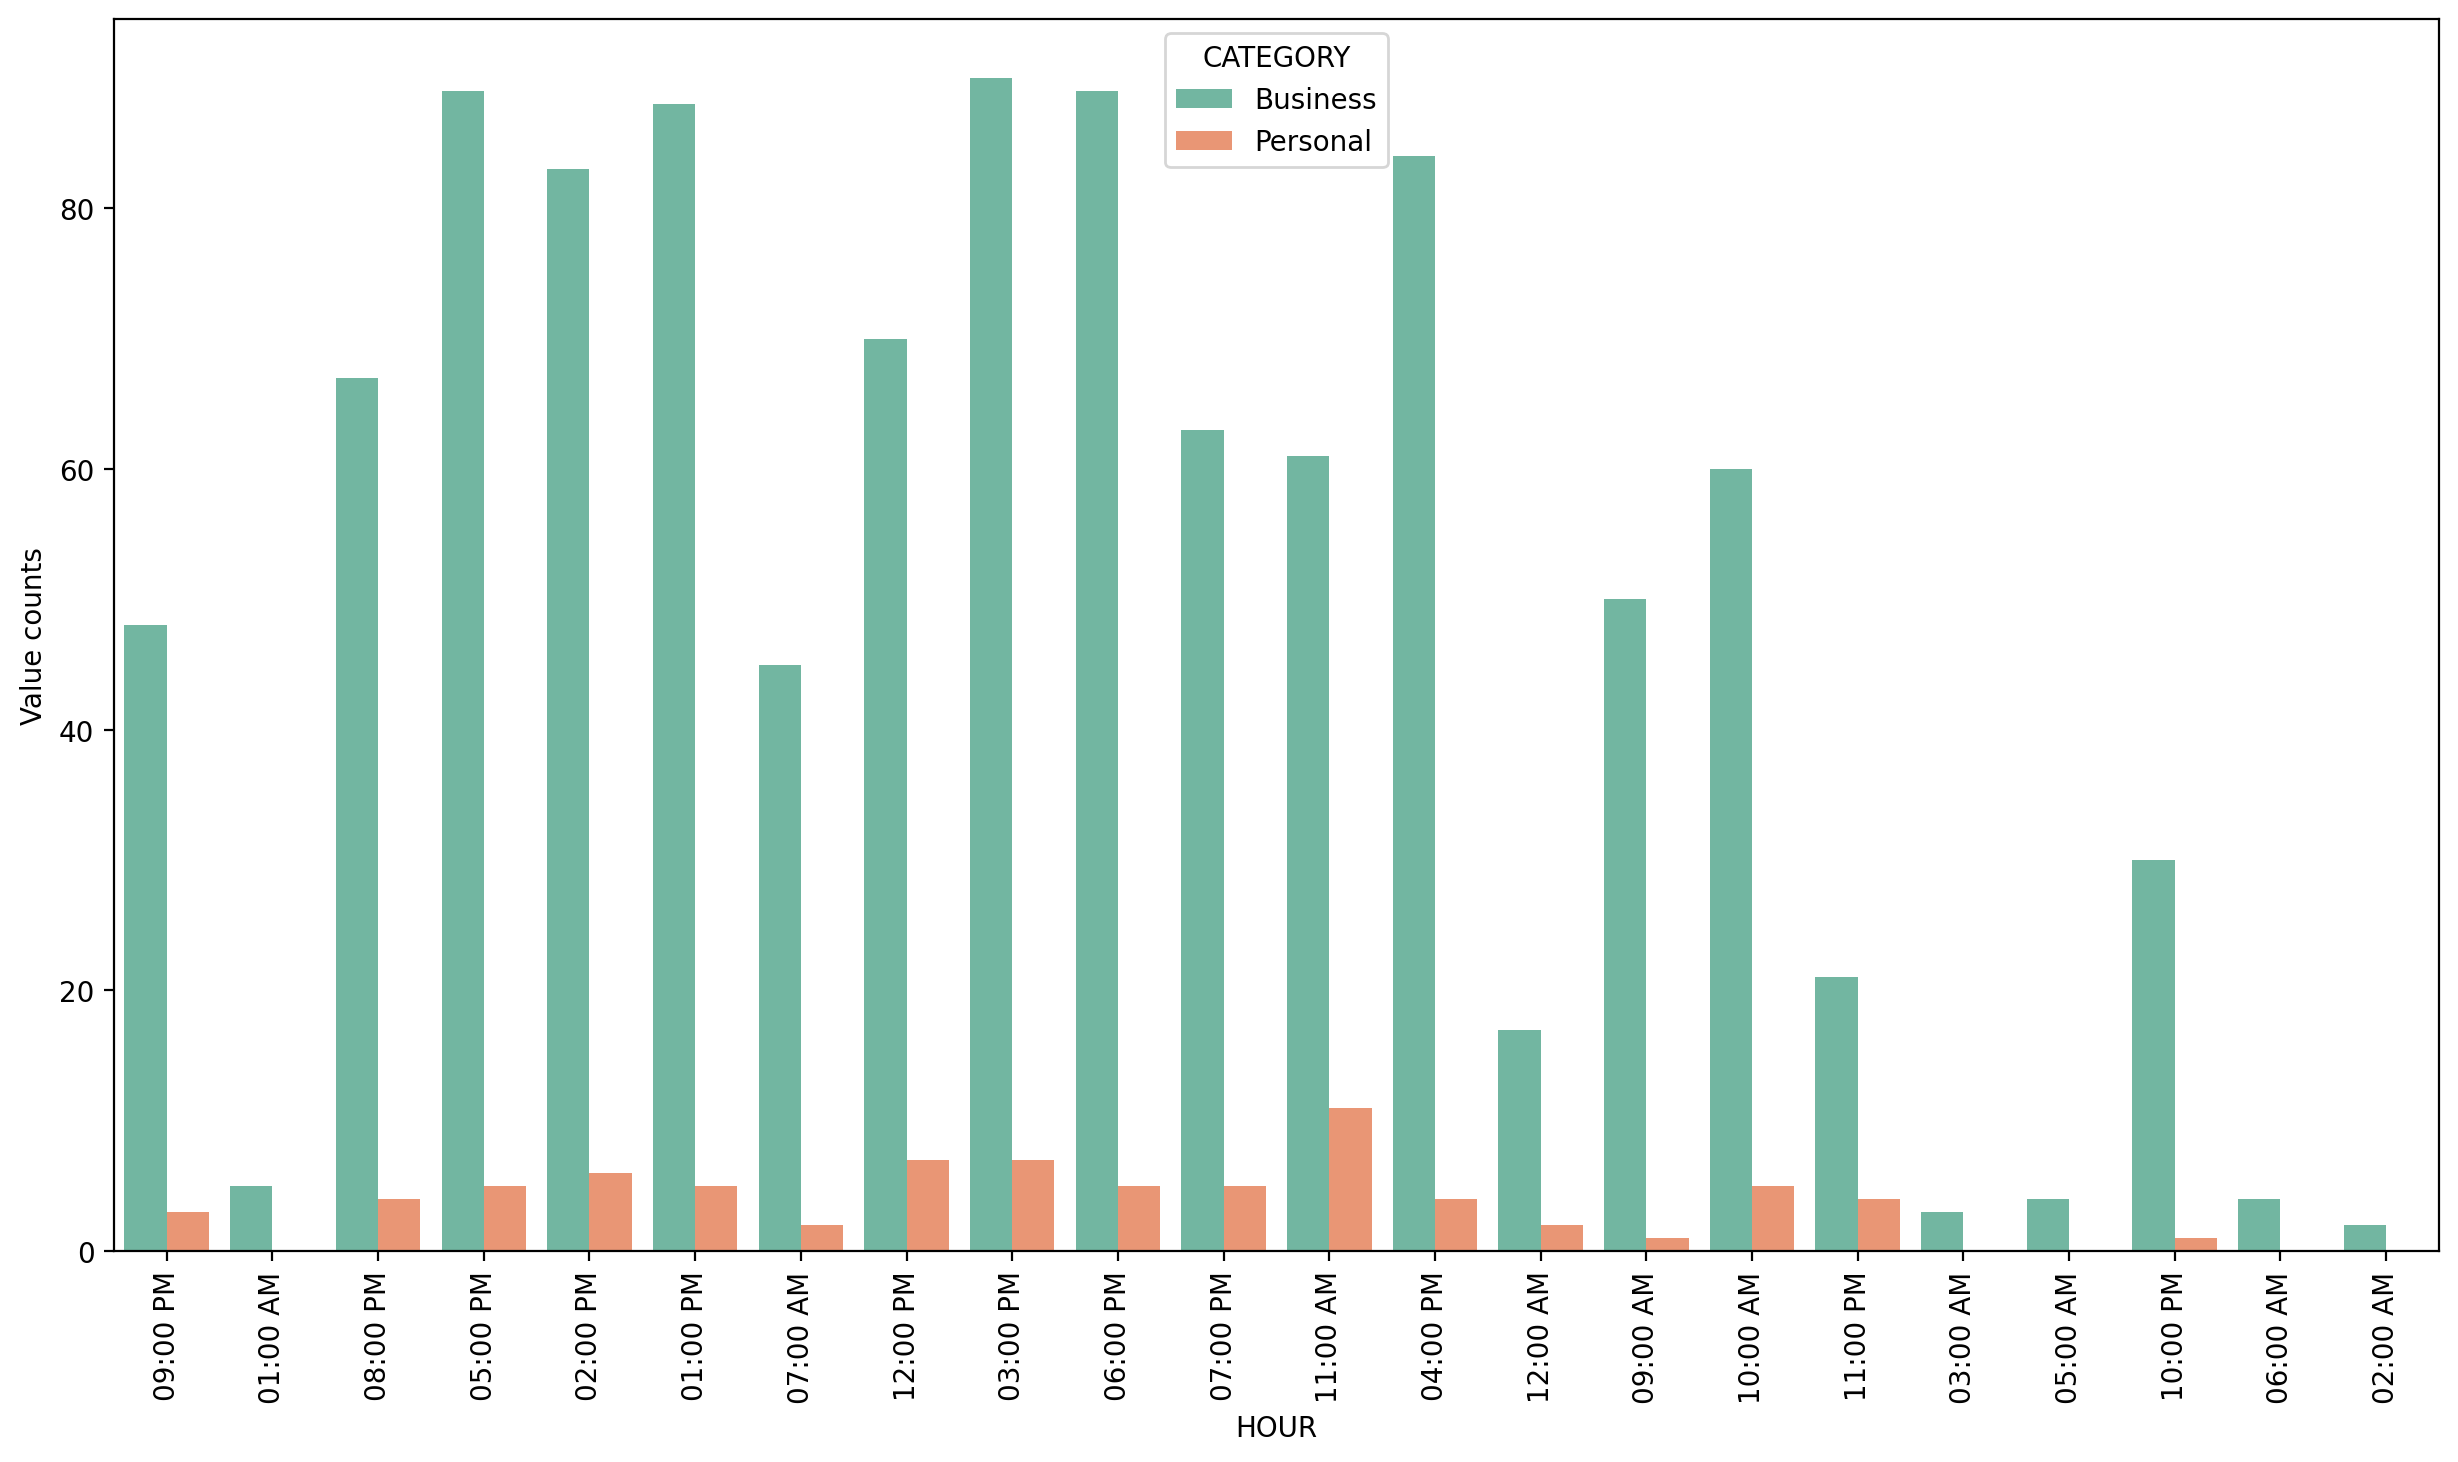

In [104]:
plt.figure(figsize=(15,8), dpi=200)
plt.xticks(rotation=90);
sns.countplot(x='HOUR', hue='CATEGORY', data=df)
plt.ylabel('Value counts');

From the above plot we can see that the rider uses the uber the most at 3 PM for business purposes